<a href="https://www.kaggle.com/code/isabbaggin/classification?scriptVersionId=216782212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datanew/data2/240427SG_BN.xlsx
/kaggle/input/datanew/data2/240511IH_AN.xlsx
/kaggle/input/datanew/data2/240405SM_BN.xlsx
/kaggle/input/datanew/data2/240511IS_BN.xlsx
/kaggle/input/datanew/data2/240420BR_AN.xlsx
/kaggle/input/datanew/data2/240501BD_BP.xlsx
/kaggle/input/datanew/data2/240501SK_BP.xlsx
/kaggle/input/datanew/data2/240420AM_AP.xlsx
/kaggle/input/datanew/data2/240501BD_AP.xlsx
/kaggle/input/datanew/data2/240511BI_BN.xlsx
/kaggle/input/datanew/data2/240427AD_AP.xlsx
/kaggle/input/datanew/data2/240420RM_BP.xlsx
/kaggle/input/datanew/data2/240501DM_BP.xlsx
/kaggle/input/datanew/data2/240229SM_BN.xlsx
/kaggle/input/datanew/data2/240427IM_AN.xlsx
/kaggle/input/datanew/data2/240427BB_BN.xlsx
/kaggle/input/datanew/data2/240501SK_AP.xlsx
/kaggle/input/datanew/data2/240420BM_BP.xlsx
/kaggle/input/datanew/data2/240501DM_AP.xlsx
/kaggle/input/datanew/data2/240511IH_BN.xlsx
/kaggle/input/datanew/data2/240405SM_AN.xlsx
/kaggle/input/datanew/data2/240427SD_AN.xlsx
/kaggle/in

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.widgets import CheckButtons


# def plot_data(matrix):
#     time_per_row = np.arange(0, 12000, 1)  # Time vector for 2400 rows
#     matrix=np.array(matrix)
#     plt.figure(figsize=(20,8))
#     for i in range(matrix.shape[0]):
#       plt.plot(np.array(matrix[i,:]))
#
#     # for i, row in enumerate(MATRIX):
#     #     plt.scatter(time_per_row, row)
#
#     # Adding labels and title
#     plt.title('LH_B_P')
#     plt.xlabel('TIME')
#     plt.ylabel('AMPLITUDE')
#     plt.legend()
#     plt.show()
#
#     # Plot LH data
#     # for i in range(LH_all_pre.shape[0]):
#     #     axs[0].plot(time_per_row, LH_all_pre[i, :, 0])
#     #
#     # axs[0].set_title("LH Data - Time vs Amplitude")
#     # axs[0].set_xlabel("Time (minutes)")
#     # axs[0].set_ylabel("Amplitude")
#     # axs[0].legend()
#     # axs[0].grid(True)
#     #
#     # # Plot RH data
#     # for i in range(RH_all_pre.shape[0]):
#     #     axs[1].plot(time_per_row, RH_all_pre[i, :, 0])
#     #
#     # axs[1].set_title("RH Data - Time vs Amplitude")
#     # axs[1].set_xlabel("Time (minutes)")
#     # axs[1].set_ylabel("Amplitude")
#     # axs[1].legend()
#     # axs[1].grid(True)
#     #
#     # # Plot LL data
#     # for i in range(LL_all_pre.shape[0]):
#     #     axs[2].plot(time_per_row, LL_all_pre[i, :, 0])
#     #
#     # axs[2].set_title("LL Data - Time vs Amplitude")
#     # axs[2].set_xlabel("Time (minutes)")
#     # axs[2].set_ylabel("Amplitude")
#     # axs[2].legend()
#     # axs[2].grid(True)
#     #
#     # # Plot RL data
#     # for i in range(RL_all_pre.shape[0]):
#     #     axs[3].plot(time_per_row, RL_all_pre[i, :, 0])
#     #
#     # axs[3].set_title("RL Data - Time vs Amplitude")
#     # axs[3].set_xlabel("Time (minutes)")
#     # axs[3].set_ylabel("Amplitude")
#     # axs[3].legend()
#     # axs[3].grid(True)
#
#     plt.tight_layout(pad=2.0)
#     plt.show()

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

def plot_with_widgets(matrix):
    matrix = np.array(matrix)
    fig, ax = plt.subplots(figsize=(10, 5))

    # Initial plot
    lines = []
    for i in range(matrix.shape[0]):
        line, = ax.plot(matrix[i, :], label=f'Line {i+1}')
        lines.append(line)
    ax.legend()

    # Create checkboxes for each line
    checkboxes = [widgets.Checkbox(value=True, description=f'Line {i+1}') for i in range(matrix.shape[0])]
    check_ui = widgets.VBox(checkboxes)

    def update_plot(*args):
        # Clear the current axes
        ax.clear()

        # Re-plot only the lines with checked checkboxes
        for i, checkbox in enumerate(checkboxes):
            if checkbox.value:  # If checkbox is checked
                ax.plot(matrix[i, :], label=f'Line {i+1}')

        # Redraw the legend and labels
        ax.legend()
        ax.set_title('Interactive Line Plot')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')

        # Redraw the figure
        fig.canvas.draw()

    # Link the checkboxes to the update_plot function
    for checkbox in checkboxes:
        checkbox.observe(update_plot, 'value')

    # Display the checkboxes UI
    display(check_ui)
    plt.show()






def plot_data(matrix, save_path='C:\\Users\\PC1\\Pictures\\plot\\deviation_post_P.jpg'):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)

    plt.figure(figsize=(20, 10))
    palette = sns.color_palette("husl", matrix.shape[0])
    for i in range(matrix.shape[0]):
        plt.plot(matrix[i, :], color=palette[i], linewidth=1.0)
    plt.title('deviation_post_P', fontsize=16)
    plt.xlabel('TIME', fontsize=14)
    plt.ylabel('AMPLITUDE', fontsize=14)
    plt.legend(title="Data Rows", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    plt.tight_layout()
#     plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()

def plot(matrix, save_path='C:\\Users\\PC1\\Pictures\\plot\\deviation_post_NP.jpg'):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)
    fig, ax = plt.subplots(figsize=(20, 10))
    palette = sns.color_palette("husl", matrix.shape[0])
    lines = []
    for i in range(matrix.shape[0]):
        line, = ax.plot(matrix[i, :], color=palette[i], linewidth=1.0, label=f'Line {i + 1}')
        lines.append(line)
    ax.set_title('deviation_post_NP', fontsize=16)
    ax.set_xlabel('TIME', fontsize=14)
    ax.set_ylabel('AMPLITUDE', fontsize=14)
    labels = [f'Line {i + 1}' for i in range(matrix.shape[0])]
    check = CheckButtons(ax=plt.axes([0.8, 0.4, 0.1, 0.15]), labels=labels, actives=[True] * len(labels))

    for i, line in enumerate(lines):
        check.labels[i].set_color(line.get_color())
    def func(label):
        index = labels.index(label)
        lines[index].set_visible(not lines[index].get_visible())
        plt.draw()

    check.on_clicked(func)

    plt.tight_layout()
    # plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()


def plot_state_means(LH_all_pre_P, RH_all_pre_P, save_path='C:\\Users\\PC1\\Pictures\\plot\\pre_P.jpg'):

    def extract_state_data(combined_LH, combined_RH):
        states = {}
        num_samples = combined_LH.shape[0]  # Number of samples
        num_states = combined_LH.shape[2]    # Number of states (5 in this case)

        for i in range(num_samples):  # Iterate through the samples
            for j in range(num_states):  # Iterate through the states
                state_name = f'State {j + 1}'
                if state_name not in states:
                    states[state_name] = []
                states[state_name].append(combined_LH[i, :, j])  # Append LH data
                states[state_name].append(combined_RH[i, :, j])  # Append RH data

        return states


    state_data_pre_P = extract_state_data(LH_all_pre_P, RH_all_pre_P)
    print(state_data_pre_P)
    means = {}
    for state_name, data in state_data_pre_P.items():
        means[state_name] = [np.mean(data_array) for data_array in data]
    box_data = {state: [] for state in means.keys()}
    for state in means.keys():
        box_data[state].extend(means[state])
    # plt.figure(figsize=(15, 10))
    # sns.boxplot(data=[box_data[state] for state in box_data], palette="Set3")
    # plt.xticks(ticks=np.arange(len(box_data)), labels=box_data.keys())
    # plt.title('Box Plots of Means for Each State')
    # plt.xlabel('States')
    # plt.ylabel('Mean Values')
    # # plt.legend(['Pre P', 'Post P', 'Pre NP', 'Post NP'], loc='upper right')
    # plt.savefig(save_path, format='jpg', dpi=300)
    # plt.tight_layout()
    # plt.show()

# Example usage:
# if __name__ == "__main__":
#     plot_state_means(LH_all_pre_P, RH_all_pre_P, LH_all_post_P, RH_all_post_P,
#                      LH_all_pre_NP, RH_all_pre_NP, LH_all_post_NP, RH_all_post_NP)

def plot_median_of_means(LH_all_pre_P, RH_all_pre_P):

    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)

    #Number of states (columns)

    num_states = combined_data.shape[2] # Assuming 5 states as columns 
    means_per_state = []

    # Calculate mean of each column in each 2D array

    for state in range(num_states): 
        means_for_state = []

        for matrix in combined_data: 
            means_for_state.append(np.mean(matrix[:, state])) # Mean of each column for state 
        means_per_state.append(means_for_state)

    return means_per_state


In [8]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis,skew




def calculate_statistics(data_3d):
    data_3d = np.array(pd.to_numeric(data_3d.flatten(), errors='coerce')).reshape(data_3d.shape)


    means = []
    for i in range(data_3d.shape[0]):
        data_without_nans = np.nan_to_num(data_3d[i], nan=0.0)
        mean_value = np.sum(data_without_nans) / (2400 * 5)  # Sum and divide by 2400*5
        means.append(mean_value)

    std_devs = []

    for i in range(data_3d.shape[0]):
        data_without_nans = np.nan_to_num(data_3d[i], nan=0.0)
        mean_value = np.sum(data_without_nans) / (2400 * 5)
        squared_diffs = (data_without_nans - mean_value) ** 2
        std_dev_value = np.sqrt(np.sum(squared_diffs) / (2400 * 5))
        std_devs.append(std_dev_value)
    # std_devs = np.nanstd(data_3d, axis=1)

    return means, std_devs

def flatten_3d_to_2d(array_3d):
    if array_3d.ndim != 3:
        raise ValueError("Input array must be 3D")
    flattened_arrays = np.array([array_3d[i].flatten() for i in range(array_3d.shape[0])])

    return flattened_arrays


# def flatten_3d_to_2d_col(array_3d):
#     array_3d = np.array(array_3d)
#     # if array_3d.ndim != 3:
#     #     raise ValueError("Input array must be 3D")
#     n_slices, rows, cols = array_3d.shape
#     flattened_arrays = []
#     for i in range(n_slices):
#         array_2d = array_3d[i]
#         flattened_array = array_2d.T.flatten()  # Transpose to get columns first, then flatten
#         flattened_arrays.append(flattened_array)
#
#     return np.array(flattened_arrays)

import numpy as np


def flatten_3d_to_2d_col(array_3d):
    target_shape = (2400, 5)  # The desired shape for all 2D arrays

    # Ensure array_3d is a list and handle inconsistent shapes
    if isinstance(array_3d, list):
        padded_arrays = []

        for sub_array in array_3d:
            sub_array = np.asarray(sub_array)

            # Check the shape of the current sub-array
            if sub_array.shape != target_shape:
                # Pad with zeros to make it (2400, 5)
                padded_sub_array = np.zeros(target_shape)
                # Fill in the available data
                rows, cols = sub_array.shape
                padded_sub_array[:rows, :cols] = sub_array
                padded_arrays.append(padded_sub_array)
            else:
                padded_arrays.append(sub_array)

        array_3d = np.array(padded_arrays)

    # Check if the input is now a valid 3D array
    if array_3d.ndim != 3:
        raise ValueError("Input array must be 3D")

    n_slices, rows, cols = array_3d.shape
    flattened_arrays = []

    for i in range(n_slices):
        array_2d = array_3d[i]
        flattened_array = array_2d.T.flatten()  # Transpose to get columns first, then flatten
        flattened_arrays.append(flattened_array)

    return np.array(flattened_arrays)


def z_normalize(array_1d, mean, std_dev):
    return (array_1d - mean) / std_dev


def calculate_normalized_variance_and_kurtosis(data):
    data = np.asarray(data, dtype=float)  # Convert to float, handles None
    data = np.nan_to_num(data)
    normalized_variance = np.var(data, ddof=1)  # Sample variance
    kurt_value = kurtosis(data)
    return normalized_variance, kurt_value

def process_batches_for_normalised(array_1d, batch_size=200):
    num_batches = len(array_1d) // batch_size
    variances = []
    kurtoses = []

    for i in range(num_batches):
        batch = array_1d[i * batch_size:(i + 1) * batch_size]
        var, kurt = calculate_normalized_variance_and_kurtosis(batch)
        variances.append(var)
        kurtoses.append(kurt)

    return np.array(variances), np.array(kurtoses)

def calculate_statistics_in_batches(data):
    # Ensure data is numeric and replace NaN/None with 0
    data = np.asarray(data, dtype=float)  # Convert to float, handles None
    data = np.nan_to_num(data)  # Replace NaN with 0

    # Calculate mean, standard deviation, variance, and skewness
    mean_value = np.mean(data)
    std_dev_value = np.std(data, ddof=1)  # Sample std deviation
    variance_value = np.var(data, ddof=1)  # Sample variance
    skewness_value = skew(data)

    return mean_value, std_dev_value, variance_value, skewness_value

def process_batches_raw(array_1d, batch_size=200):
    num_batches = len(array_1d) // batch_size
    means = []
    stddevs=[]
    variances=[]
    skews=[]

    for i in range(num_batches):
        batch = array_1d[i * batch_size:(i + 1) * batch_size]
        mm, sstd, varr, skewness = calculate_statistics_in_batches(batch)
        variances.append(varr)
        means.append(mm)
        stddevs.append(sstd)
        skews.append(skewness)


    return np.array(means), np.array(stddevs), np.array(variances), np.array(skews)

In [2]:
import os
import numpy as np
import pandas as pd
from tkinter import filedialog
# from plot import plot_data, plot_state_means
# from characteristics import calculate_statistics, flatten_3d_to_2d, z_normalize, \
#    process_batches_for_normalised, process_batches_raw, flatten_3d_to_2d_col
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_extract_data(filepath):
    # try:
    dataall = pd.read_excel(filepath, sheet_name='240229SN').to_numpy()
    # except ValueError as e:
    #     print(f"Error processing {filename}: {e}")


    LH = dataall[:, 11:43:7]
    RH = dataall[:, 12:43:7]
    LL = dataall[:, 13:43:7]
    RL = dataall[:, 14:43:7]

    LH = LH[2:2404, :]
    RH = RH[2:2404, :]
    LL = LL[2:2404, :]
    RL = RL[2:2404, :]



    return LH, RH, LL, RL


def reshape_data(data, target_shape=(2400, 5)):
    if data.shape[0] < target_shape[0]:

        padded = np.zeros(target_shape)
        padded[:data.shape[0], :data.shape[1]] = data
        return padded
    elif data.shape[0] > target_shape[0]:

        return data[:target_shape[0], :target_shape[1]]
    return data

# folder_path = input("Enter the path of the folder containing Excel files: ")
folder_path = '/kaggle/input/datanew/data2'

# folder_path = filedialog.askdirectory(title="Select a folder containing Excel files")
data_dictP = {
    'A': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
    'B': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
}

data_dictNP = {
    'A': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
    'B': {
        'LH': [],
        'RH': [],
        'LL': [],
        'RL': [],
    },
}
print(folder_path)

# for filename in os.listdir(folder_path):
#     if filename.endswith('.xlsx'):
#         filepath = os.path.join(folder_path, filename)
#         try:
#             LH, RH, LL, RL = load_and_extract_data(filepath)
#
#             # Additional debug print to catch string values before processing
#             print(f"Checking for non-numeric values in {filename}")
#             print("LH:", LH)
#             print("RH:", RH)
#
#         except ValueError as e:
#             print(f"Error processing {filename}: {e}")
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_path, filename)
        LH, RH, LL, RL = load_and_extract_data(filepath)

        if filename[9] == 'A':
            if filename[10]=='P':
                data_dictP['A']['LH'].append(reshape_data(LH[:, :5]))
                data_dictP['A']['RH'].append(reshape_data(RH[:, :5]))
                data_dictP['A']['LL'].append(reshape_data(LL[:, :5]))
                data_dictP['A']['RL'].append(reshape_data(RL[:, :5]))
            else:
                data_dictNP['A']['LH'].append(reshape_data(LH[:, :5]))
                data_dictNP['A']['RH'].append(reshape_data(RH[:, :5]))
                data_dictNP['A']['LL'].append(reshape_data(LL[:, :5]))
                data_dictNP['A']['RL'].append(reshape_data(RL[:, :5]))

        elif filename[9] == 'B':
            if filename[10]=='P':
                data_dictP['B']['LH'].append(reshape_data(LH[:, :5]))
                data_dictP['B']['RH'].append(reshape_data(RH[:, :5]))
                data_dictP['B']['LL'].append(reshape_data(LL[:, :5]))
                data_dictP['B']['RL'].append(reshape_data(RL[:, :5]))
            else:
                data_dictNP['B']['LH'].append(reshape_data(LH[:, :5]))
                data_dictNP['B']['RH'].append(reshape_data(RH[:, :5]))
                data_dictNP['B']['LL'].append(reshape_data(LL[:, :5]))
                data_dictNP['B']['RL'].append(reshape_data(RL[:, :5]))


for key in data_dictP:
    for sub_key in data_dictP[key]:
        if data_dictP[key][sub_key]:
            data_dictP[key][sub_key] = np.stack(data_dictP[key][sub_key])
        else:
            data_dictP[key][sub_key] = np.zeros((0, 2400, 5))


def pad_array_to_shape(arr, target_shape):
    arr = np.asarray(arr)
    if arr.dtype.kind in {'U', 'S', 'O'}:
        arr = np.where(arr == ' ', 0, arr)
        arr = arr.astype(float)
    current_shape = arr.shape
    padded_array = np.zeros(target_shape)
    rows = min(current_shape[0], target_shape[0])
    cols = min(current_shape[1], target_shape[1])
    padded_array[:rows, :cols] = arr[:rows, :cols]

    return padded_array

target_shape = (2400, 5)

for key in data_dictNP:
    for sub_key in data_dictNP[key]:
        if data_dictNP[key][sub_key]:
            padded_arrays = [pad_array_to_shape(arr, target_shape) for arr in data_dictNP[key][sub_key]]
            data_dictNP[key][sub_key] = np.stack(padded_arrays)
        else:
            data_dictNP[key][sub_key] = np.zeros((0, *target_shape))

# for key in data_dictNP:
#     for sub_key in data_dictNP[key]:
#         if data_dictNP[key][sub_key]:
#             data_dictNP[key][sub_key] = np.stack(data_dictNP[key][sub_key])
#         else:
#             data_dictNP[key][sub_key] = np.zeros((0, 2400, 5))

# for key in data_dictNP:
#     for sub_key in data_dictNP[key]:
#         try:
#             if data_dictNP[key][sub_key]:
#                 data_dictNP[key][sub_key] = np.stack(data_dictNP[key][sub_key])
#             else:
#                 data_dictNP[key][sub_key] = np.zeros((0, 2400, 5))
#         except ValueError as e:
#             print(f"Error occurred in key: {key}, sub_key: {sub_key}")
#             # print(f"Data: {data_dictNP[key][sub_key]}")
#             print(f"Error message: {e}")


LH_all_pre_P = 1000*data_dictP['B']['LH']
RH_all_pre_P = 1000*data_dictP['B']['RH']
# LL_all_pre_P = data_dictP['B']['LL']
# RL_all_pre_P = data_dictP['B']['RL']

LH_all_post_P = 1000*data_dictP['A']['LH']
RH_all_post_P = 1000*data_dictP['A']['RH']
# LL_all_post_P = data_dictP['A']['LL']
# RL_all_post_P = data_dictP['A']['RL']


LH_all_pre_NP = 1000*data_dictNP['B']['LH']
RH_all_pre_NP = 1000*data_dictNP['B']['RH']
# LL_all_pre_NP = data_dictNP['B']['LL']
# RL_all_pre_NP = data_dictNP['B']['RL']

LH_all_post_NP = 1000*data_dictNP['A']['LH']
RH_all_post_NP = 1000*data_dictNP['A']['RH']
# LL_all_post_NP = data_dictNP['A']['LL']
# RL_all_post_NP = data_dictNP['A']['RL']




# means_LH_all_pre_P, std_devs_LH_all_pre_P = calculate_statistics(LH_all_pre_P)
# means_LH_all_pre_NP, std_devs_LH_all_pre_NP = calculate_statistics(LH_all_pre_NP)
# means_RH_all_pre_P, std_devs_RH_all_pre_P = calculate_statistics(RH_all_pre_P)
# means_RH_all_pre_NP, std_devs_RH_all_pre_NP = calculate_statistics(RH_all_pre_NP)
# means_LH_all_post_P, std_devs_LH_all_post_P = calculate_statistics(LH_all_post_P)
# means_LH_all_post_NP, std_devs_LH_all_post_NP = calculate_statistics(LH_all_post_NP)
# means_RH_all_post_P, std_devs_RH_all_post_P = calculate_statistics(RH_all_post_P)
# means_RH_all_post_NP, std_devs_RH_all_post_NP = calculate_statistics(RH_all_post_NP)

# means_LH_all_pre_P = np.mean(flattened_LH_all_pre_P, axis=1)
# means_LH_all_pre_NP = np.mean(flattened_LH_all_pre_NP, axis=1)
# means_RH_all_pre_P = np.mean(flattened_RH_all_pre_P, axis=1)
# means_RH_all_pre_NP = np.mean(flattened_RH_all_pre_NP, axis=1)
# means_LH_all_post_P = np.mean(flattened_LH_all_post_P, axis=1)
# means_LH_all_post_NP = np.mean(flattened_LH_all_post_NP, axis=1)
# means_RH_all_post_P = np.mean(flattened_RH_all_post_P, axis=1)
# means_RH_all_post_NP = np.mean(flattened_RH_all_post_NP, axis=1)
# print(means_LH_all_pre_NP)
#
# for i in range(flattened_LH_all_pre_P.shape[0]):
#     flattened_LH_all_pre_P[i, :] -= means_LH_all_pre_P[i]
#
# for i in range(flattened_LH_all_pre_NP.shape[0]):
#     flattened_LH_all_pre_NP[i, :] -= means_LH_all_pre_NP[i]
#
# for i in range(flattened_RH_all_pre_P.shape[0]):
#     flattened_RH_all_pre_P[i, :] -= means_RH_all_pre_P[i]
#
# for i in range(flattened_RH_all_pre_NP.shape[0]):
#     flattened_RH_all_pre_NP[i, :] -= means_RH_all_pre_NP[i]
#
# for i in range(flattened_LH_all_post_P.shape[0]):
#     flattened_LH_all_post_P[i, :] -= means_LH_all_post_P[i]
#
# for i in range(flattened_LH_all_post_NP.shape[0]):
#     flattened_LH_all_post_NP[i, :] -= means_LH_all_post_NP[i]
#
# for i in range(flattened_RH_all_post_P.shape[0]):
#     flattened_RH_all_post_P[i, :] -= means_RH_all_post_P[i]
#
# for i in range(flattened_RH_all_post_NP.shape[0]):
#     flattened_RH_all_post_NP[i, :] -= means_RH_all_post_NP[i]
#
# deviation_pre_P = np.vstack((flattened_LH_all_pre_P, flattened_RH_all_pre_P))
# deviation_pre_NP = np.vstack((flattened_LH_all_pre_NP, flattened_RH_all_pre_NP))
# deviation_post_P = np.vstack((flattened_LH_all_post_P, flattened_RH_all_post_P))
# deviation_post_NP = np.vstack((flattened_LH_all_post_NP, flattened_RH_all_post_NP))
# plot_data(deviation_post_P)

# Print the results but datatype np.float
# print("LH Means:\n", means_LH)
# print("LH Standard Deviations:\n", std_devs_LH)
# print("RH Means:\n", means_RH)
# print("RH Standard Deviations:\n", std_devs_RH)


# print("LH Means:")
# print([float(mean) for mean in means_LH])
# print("LH Standard Deviations:")
# print([float(std_dev) for std_dev in std_devs_LH])
# print("RH Means:")
# print([float(mean) for mean in means_RH])
# print("RH Standard Deviations:")
# print([float(std_dev) for std_dev in std_devs_RH])

# LH_all_pre_normalised=flatten_3d_to_2d(LH_all_pre)
# LH_all_pre_raw=LH_all_pre_normalised
# for i in range(0,len(means_LH_all_pre)):
#   LH_all_pre_normalised[i]=z_normalize(LH_all_pre_normalised[i],means_LH_all_pre[i],std_devs_LH_all_pre[i])
#
# RH_all_pre_normalised=flatten_3d_to_2d(RH_all_pre)
# RH_all_pre_raw=RH_all_pre_normalised
# for i in range(0,len(means_RH_all_pre)):
#   RH_all_pre_normalised[i]=z_normalize(RH_all_pre_normalised[i],means_RH_all_pre[i],std_devs_RH_all_pre[i])
#
# LH_all_post_normalised=flatten_3d_to_2d(LH_all_post)
# LH_all_post_raw=LH_all_post_normalised
# for i in range(0,len(means_LH_all_post)):
#   LH_all_post_normalised[i]=z_normalize(LH_all_post_normalised[i],means_LH_all_post[i],std_devs_LH_all_post[i])
#
# RH_all_post_normalised=flatten_3d_to_2d(RH_all_post)
# RH_all_post_raw=RH_all_post_normalised
# for i in range(0,len(means_RH_all_post)):
#   RH_all_post_normalised[i]=z_normalize(RH_all_post_normalised[i],means_RH_all_post[i],std_devs_RH_all_post[i])
#
#
#
#
# normalised_variances_pre_LH = []
# normalised_kurtoses_pre_LH = []
# for array in LH_all_pre_normalised:
#     var, kurt = process_batches_for_normalised(array)
#     normalised_variances_pre_LH.append(var)
#     normalised_kurtoses_pre_LH.append(kurt)
# normalised_variances_pre_LH = np.array(normalised_variances_pre_LH)
# normalised_kurtoses_pre_LH = np.array(normalised_kurtoses_pre_LH)
#
#
# normalised_variances_pre_RH = []
# normalised_kurtoses_pre_RH = []
# for array in RH_all_pre_normalised:
#     var, kurt = process_batches_for_normalised(array)
#     normalised_variances_pre_RH.append(var)
#     normalised_kurtoses_pre_RH.append(kurt)
# normalised_variances_pre_RH = np.array(normalised_variances_pre_RH)
# normalised_kurtoses_pre_RH = np.array(normalised_kurtoses_pre_RH)
#
#
# raw_means_pre_LH=[]
# raw_stddev_pre_LH=[]
# raw_variance_pre_LH=[]
# raw_skewness_pre_LH=[]
# for array in LH_all_pre_raw:
#     mean, std, var, skew = process_batches_raw(array)
#     raw_means_pre_LH.append(mean)
#     raw_stddev_pre_LH.append(std)
#     raw_variance_pre_LH.append(var)
#     raw_skewness_pre_LH.append(skew)
# raw_means_pre_LH = np.array(raw_means_pre_LH)
# raw_stddev_pre_LH = np.array(raw_stddev_pre_LH)
# raw_variance_pre_LH=np.array(raw_variance_pre_LH)
# raw_skewness_pre_LH=np.array(raw_skewness_pre_LH)
#
#
# raw_means_pre_RH=[]
# raw_stddev_pre_RH=[]
# raw_variance_pre_RH=[]
# raw_skewness_pre_RH=[]
# for array in RH_all_pre_raw:
#     mean, std, var, skew = process_batches_raw(array)
#     raw_means_pre_RH.append(mean)
#     raw_stddev_pre_RH.append(std)
#     raw_variance_pre_RH.append(var)
#     raw_skewness_pre_RH.append(skew)
# raw_means_pre_RH = np.array(raw_means_pre_RH)
# raw_stddev_pre_RH = np.array(raw_stddev_pre_RH)
# raw_variance_pre_RH=np.array(raw_variance_pre_RH)
# raw_skewness_pre_RH=np.array(raw_skewness_pre_RH)
#
#
#
# normalised_variances_post_LH = []
# normalised_kurtoses_post_LH = []
# for array in LH_all_post_normalised:
#     var, kurt = process_batches_for_normalised(array)
#     normalised_variances_post_LH.append(var)
#     normalised_kurtoses_post_LH.append(kurt)
# normalised_variances_post_LH = np.array(normalised_variances_post_LH)
# normalised_kurtoses_post_LH = np.array(normalised_kurtoses_post_LH)
#
#
# normalised_variances_post_RH = []
# normalised_kurtoses_post_RH = []
# for array in RH_all_post_normalised:
#     var, kurt = process_batches_for_normalised(array)
#     normalised_variances_post_RH.append(var)
#     normalised_kurtoses_post_RH.append(kurt)
# normalised_variances_post_RH = np.array(normalised_variances_post_RH)
# normalised_kurtoses_post_RH = np.array(normalised_kurtoses_post_RH)
#
#
# raw_means_post_LH=[]
# raw_stddev_post_LH=[]
# raw_variance_post_LH=[]
# raw_skewness_post_LH=[]
# for array in LH_all_post_raw:
#     mean, std, var, skew = process_batches_raw(array)
#     raw_means_post_LH.append(mean)
#     raw_stddev_post_LH.append(std)
#     raw_variance_post_LH.append(var)
#     raw_skewness_post_LH.append(skew)
# raw_means_post_LH = np.array(raw_means_post_LH)
# raw_stddev_post_LH = np.array(raw_stddev_post_LH)
# raw_variance_post_LH=np.array(raw_variance_post_LH)
# raw_skewness_post_LH=np.array(raw_skewness_post_LH)
#
#
# raw_means_post_RH=[]
# raw_stddev_post_RH=[]
# raw_variance_post_RH=[]
# raw_skewness_post_RH=[]
# for array in RH_all_post_raw:
#     mean, std, var, skew = process_batches_raw(array)
#     raw_means_post_RH.append(mean)
#     raw_stddev_post_RH.append(std)
#     raw_variance_post_RH.append(var)
#     raw_skewness_post_RH.append(skew)
# raw_means_post_RH = np.array(raw_means_post_RH)
# raw_stddev_post_RH = np.array(raw_stddev_post_RH)
# raw_variance_post_RH=np.array(raw_variance_post_RH)
# raw_skewness_post_RH=np.array(raw_skewness_post_RH)

/kaggle/input/datanew/data2


# RAW DATA PLOTS****

In [5]:
def plot_data(matrix, save_path):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)

    plt.figure(figsize=(20, 10))
#     palette = sns.color_palette("husl", matrix.shape[0])
    for i in range(matrix.shape[0]):
        plt.plot(matrix[i, :],color='blue', linewidth=1.0)
    plt.xlabel('TIME', fontsize=14)
    plt.ylabel('AMPLITUDE', fontsize=14)
    plt.ylim(-20,15)
    plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()

In [9]:
flattened_LH_all_pre_P= flatten_3d_to_2d_col(LH_all_pre_P)
flattened_LH_all_pre_NP= flatten_3d_to_2d_col(LH_all_pre_NP)
flattened_RH_all_pre_P= flatten_3d_to_2d_col(RH_all_pre_P)
flattened_RH_all_pre_NP= flatten_3d_to_2d_col(RH_all_pre_NP)
flattened_LH_all_post_P= flatten_3d_to_2d_col(LH_all_post_P)
flattened_LH_all_post_NP= flatten_3d_to_2d_col(LH_all_post_NP)
flattened_RH_all_post_P= flatten_3d_to_2d_col(RH_all_post_P)
flattened_RH_all_post_NP= flatten_3d_to_2d_col(RH_all_post_NP)

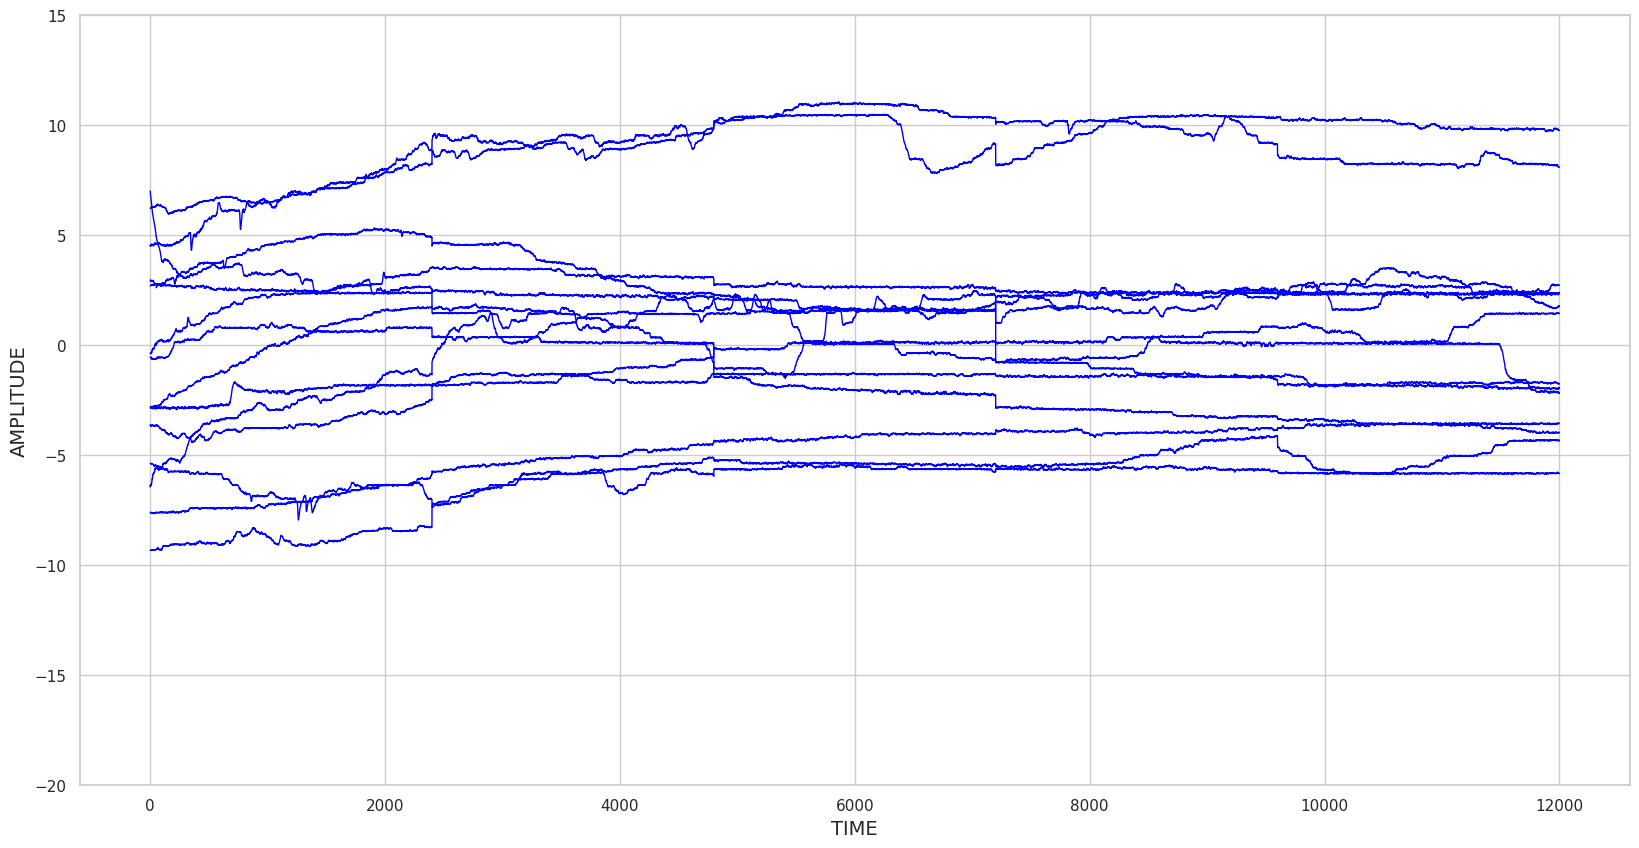

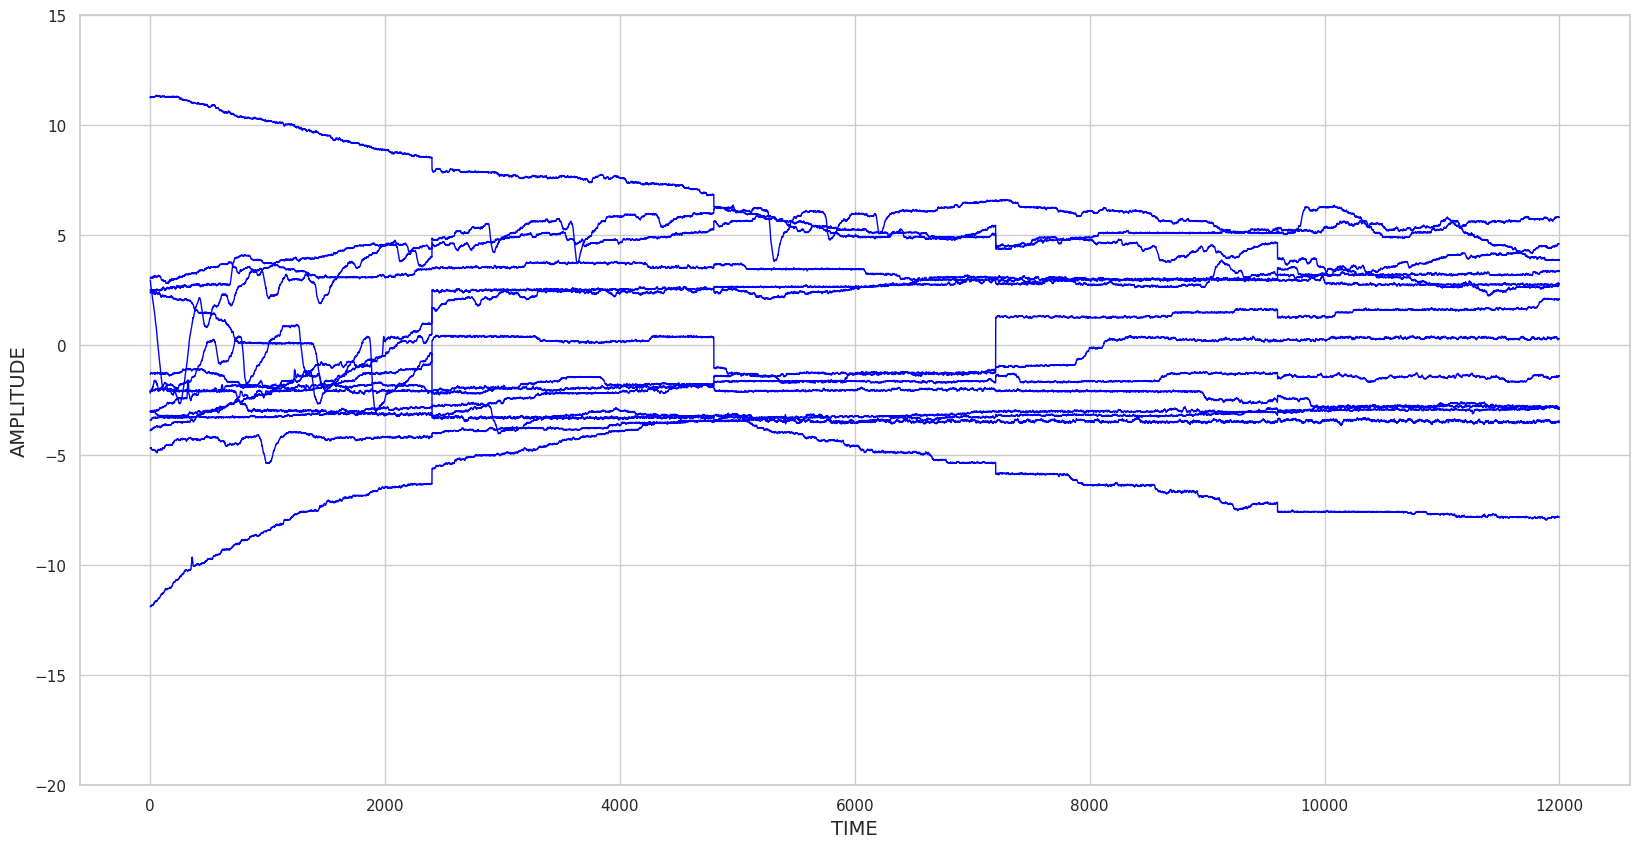

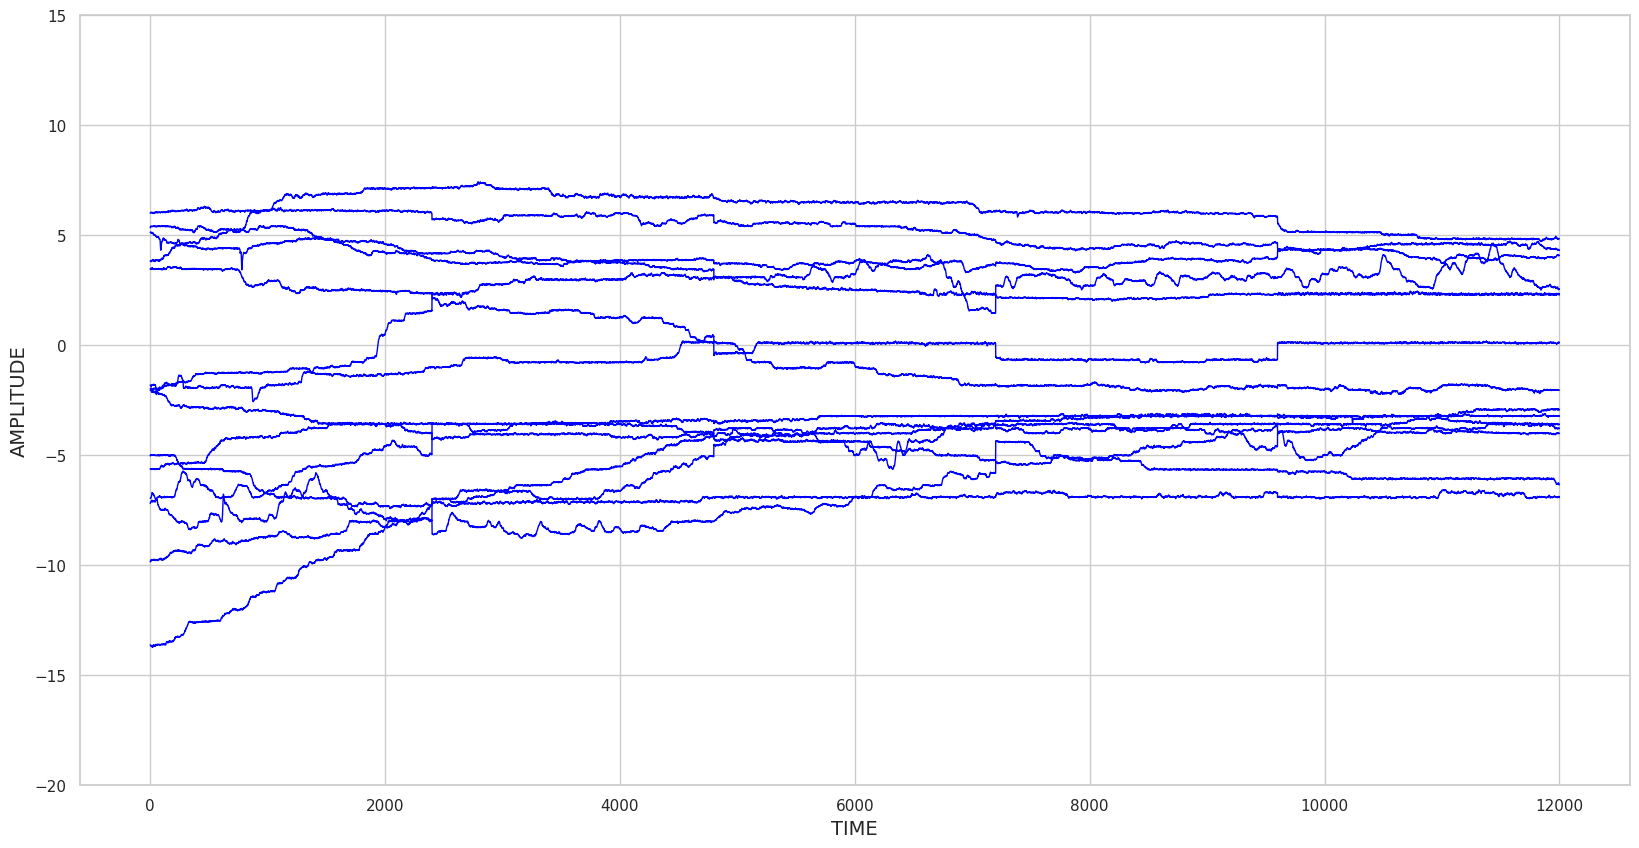

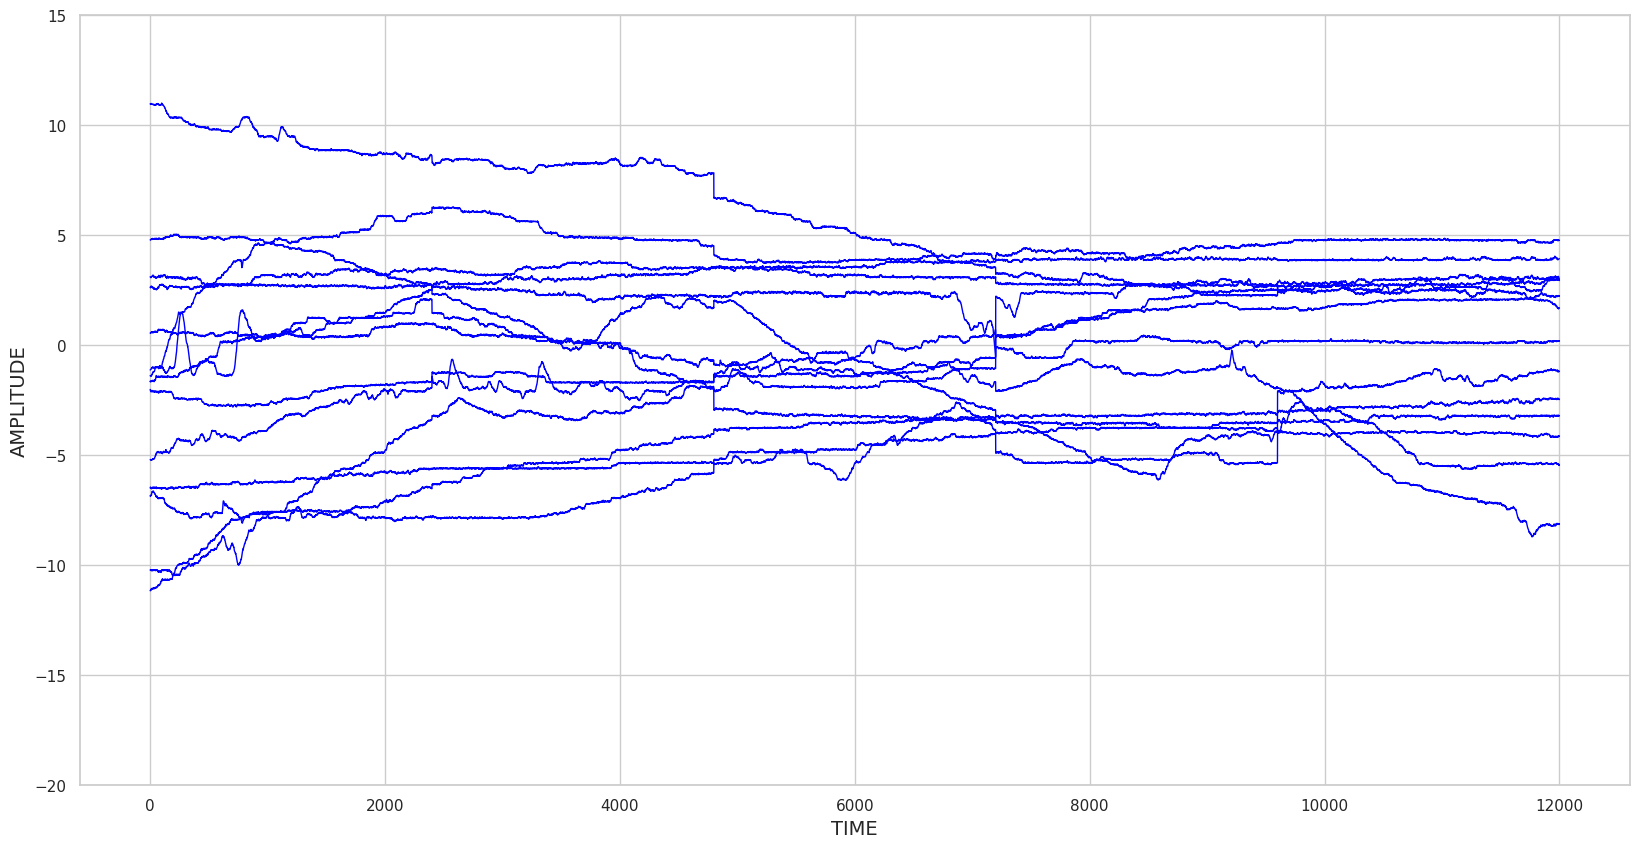

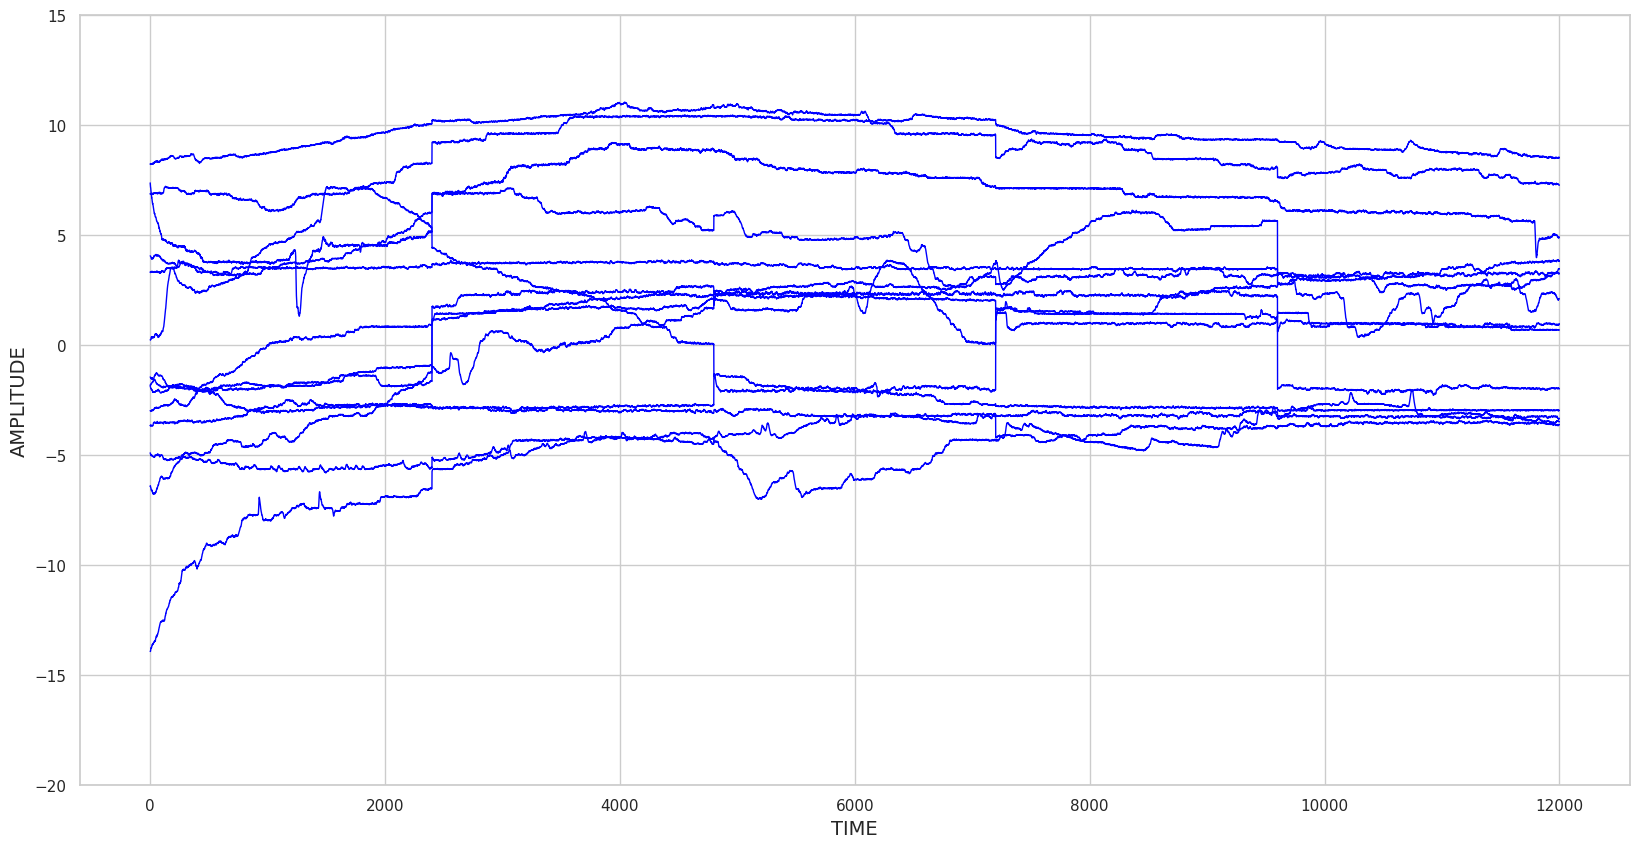

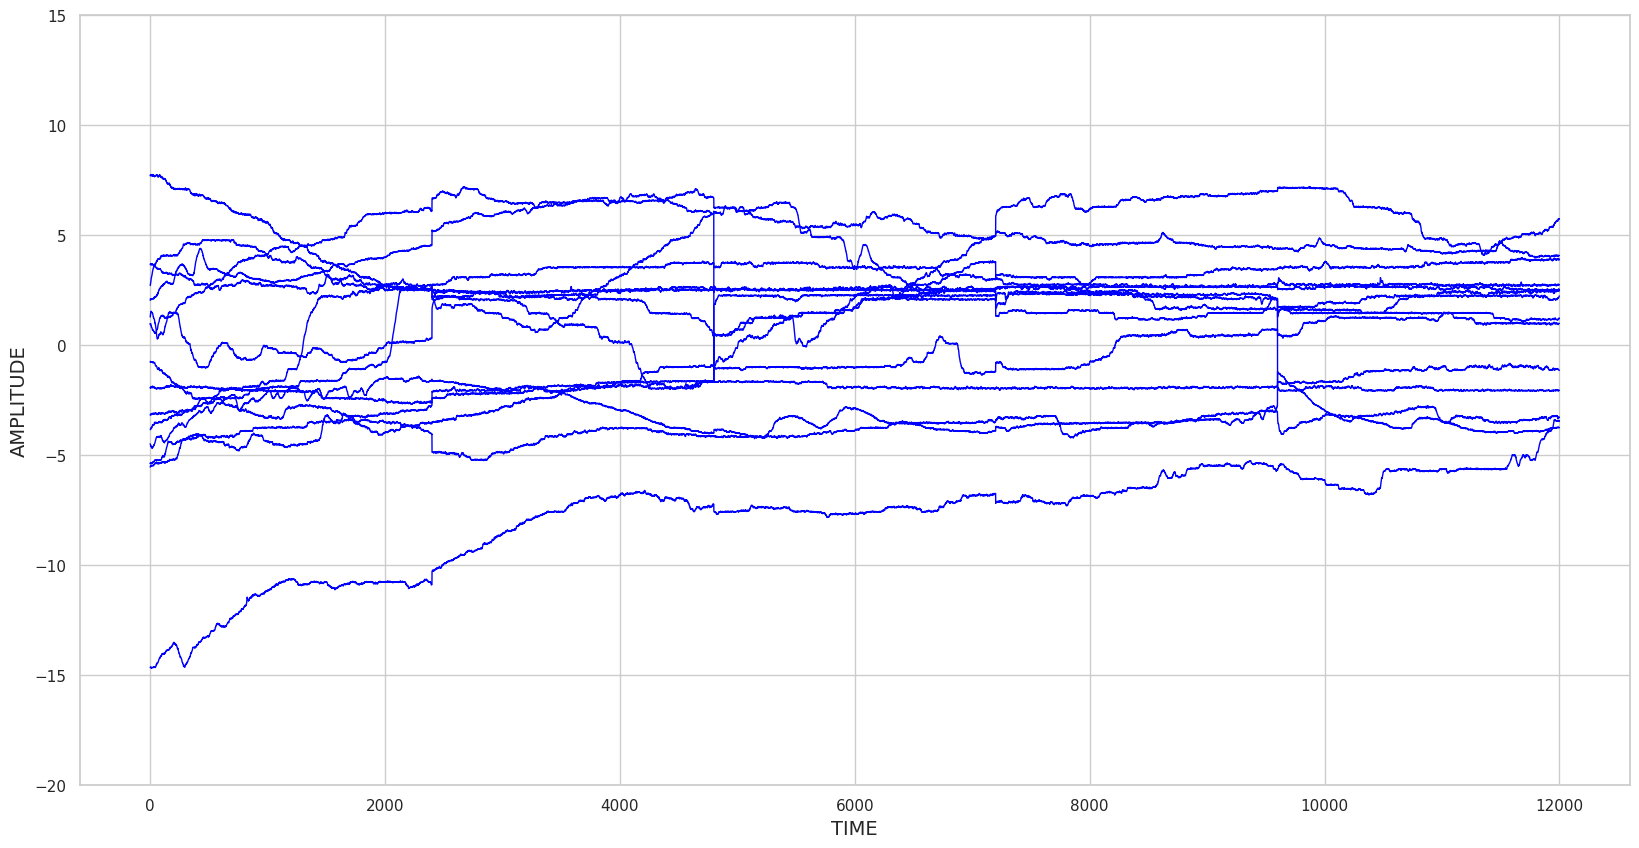

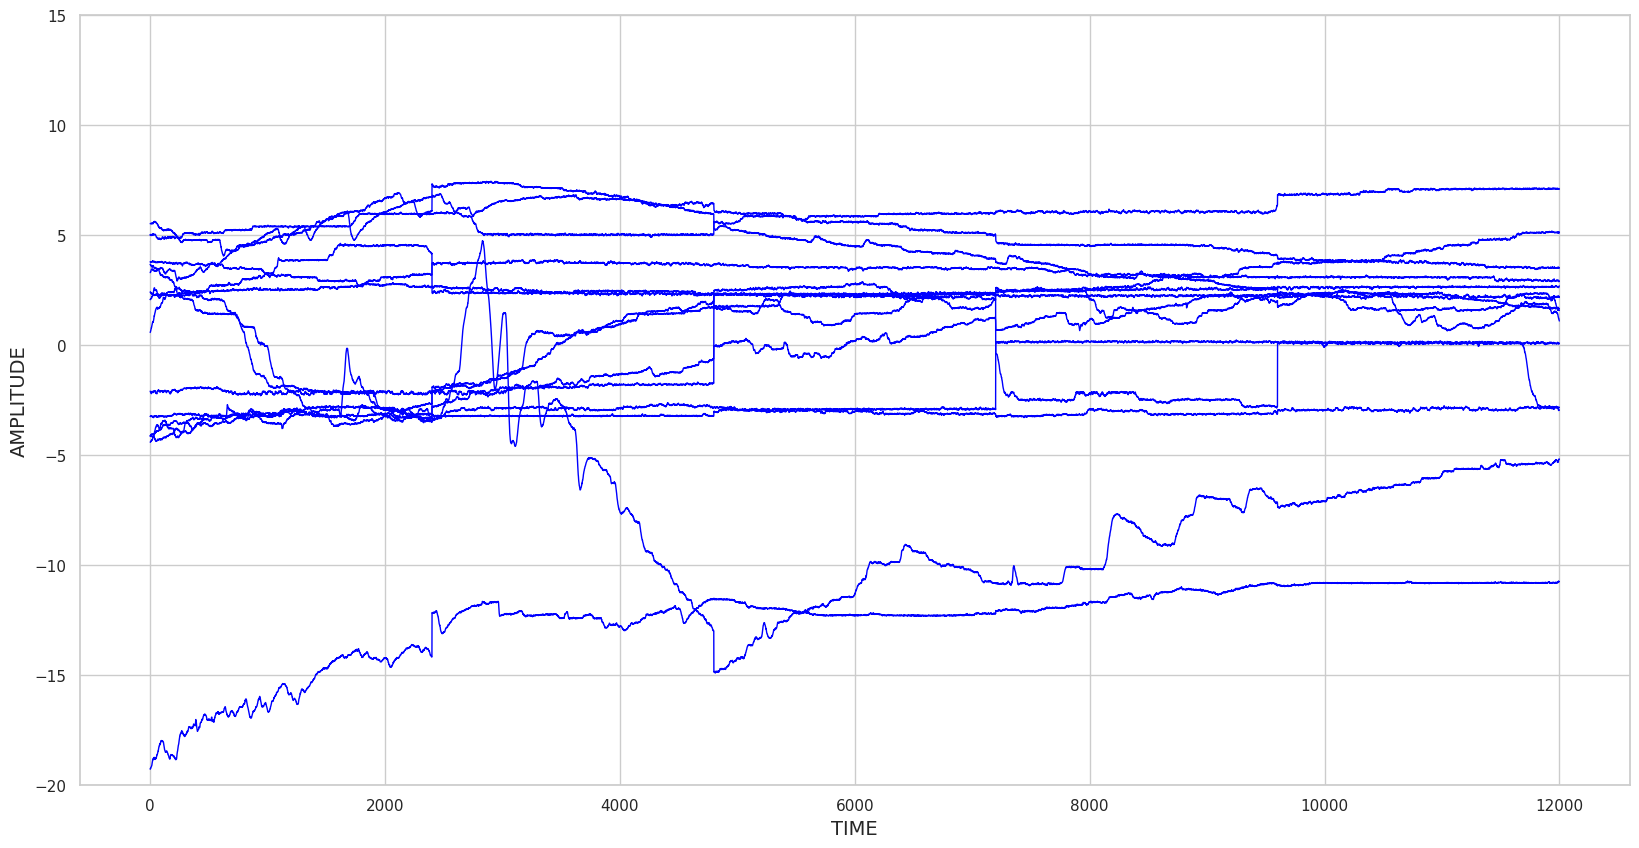

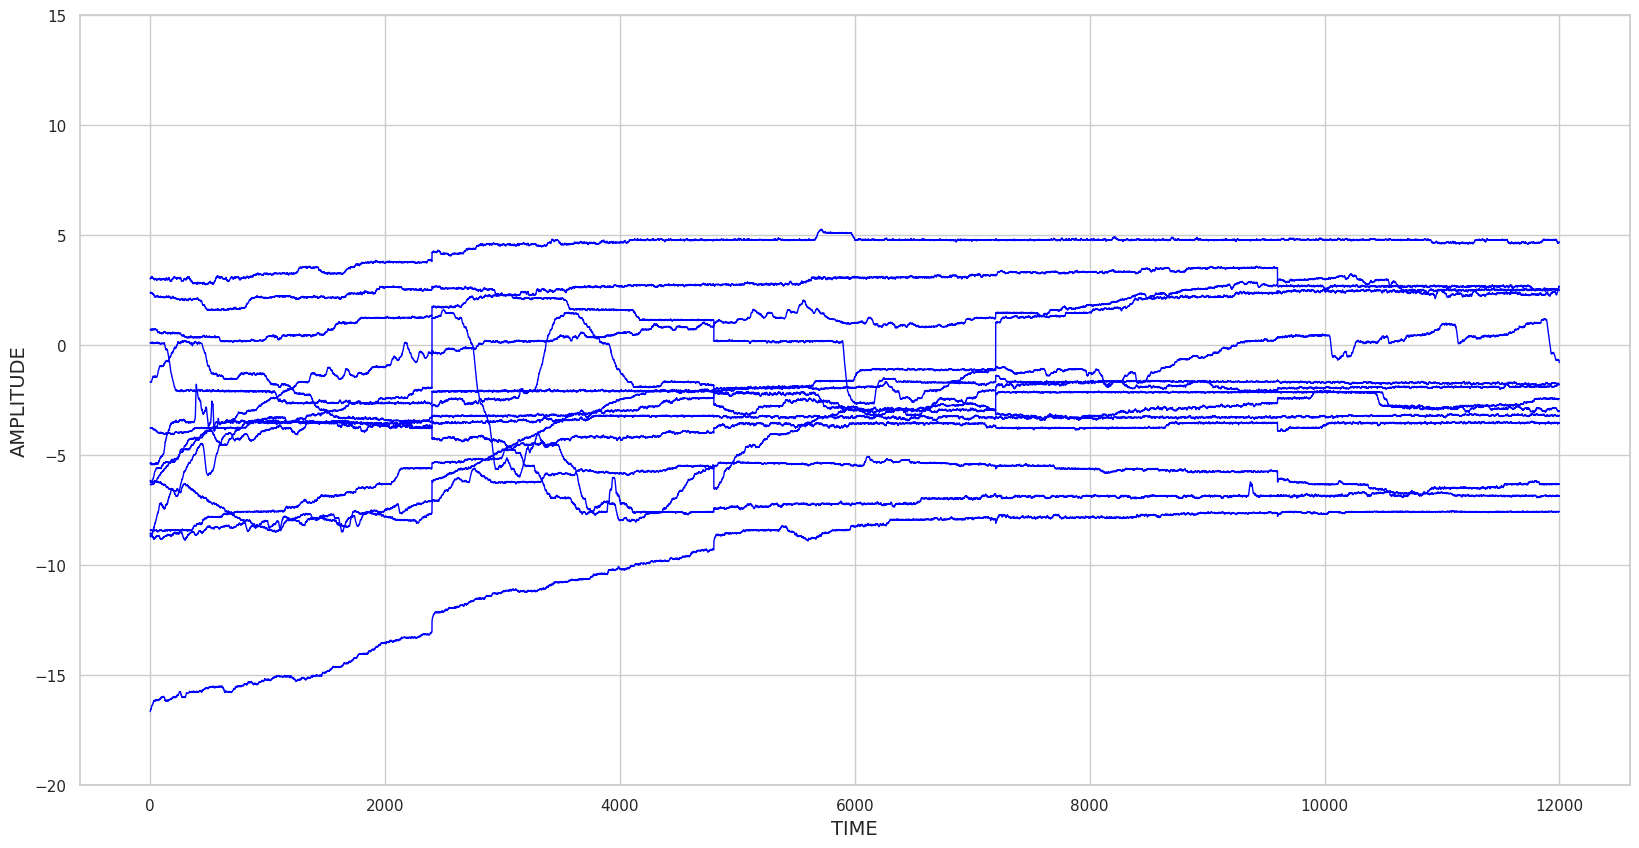

In [7]:
plot_data(flattened_LH_all_pre_P,'LH_all_pre_P_new.jpg')
plot_data(flattened_RH_all_pre_P,'RH_all_pre_P_new.jpg')
plot_data(flattened_LH_all_post_P,'LH_all_post_P_new.jpg')
plot_data(flattened_RH_all_post_P,'RH_all_post_P_new.jpg')
plot_data(flattened_LH_all_pre_NP,'LH_all_pre_NP_new.jpg')
plot_data(flattened_RH_all_pre_NP,'RH_all_pre_NP_new.jpg')
plot_data(flattened_LH_all_post_NP,'LH_all_post_NP_new.jpg')
plot_data(flattened_RH_all_post_NP,'RH_all_post_NP_new.jpg')

# DEVIATION PLOTS****

In [8]:
def plot_data(matrix, save_path):
    sns.set(style="whitegrid")
    matrix = np.array(matrix)

    plt.figure(figsize=(20, 10))
#     palette = sns.color_palette("husl", matrix.shape[0])
    for i in range(matrix.shape[0]):
        plt.plot(matrix[i, :],color='blue', linewidth=1.0)
    plt.xlabel('TIME', fontsize=14)
    plt.ylabel('AMPLITUDE', fontsize=14)
    plt.ylim(-8,8)
    plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()

In [9]:
def calculate_deviations(LH_all_pre_P, RH_all_pre_P):
    # Initialize output arrays with the same shapes
    LH_all_pre_P_dev = np.zeros_like(LH_all_pre_P)
    RH_all_pre_P_dev = np.zeros_like(RH_all_pre_P)

    # Loop through each 2D array (along the first axis) for LH_all_pre_P
    for i in range(LH_all_pre_P.shape[0]):
        mean_values = np.mean(LH_all_pre_P[i], axis=0)
        LH_all_pre_P_dev[i] = LH_all_pre_P[i] - mean_values

    # Loop through each 2D array (along the first axis) for RH_all_pre_P
    for i in range(RH_all_pre_P.shape[0]):
        mean_values = np.mean(RH_all_pre_P[i], axis=0)
        RH_all_pre_P_dev[i] = RH_all_pre_P[i] - mean_values
    flattened_LH_all_pre_P= flatten_3d_to_2d_col(LH_all_pre_P_dev)
    flattened_RH_all_pre_P= flatten_3d_to_2d_col(RH_all_pre_P_dev)
    deviation_pre_P = np.vstack((flattened_LH_all_pre_P, flattened_RH_all_pre_P))

    return deviation_pre_P


In [10]:
deviation_pre_P=calculate_deviations(LH_all_pre_P, RH_all_pre_P)
deviation_post_P=calculate_deviations(LH_all_post_P, RH_all_post_P)
deviation_pre_NP=calculate_deviations(LH_all_pre_NP, RH_all_pre_NP)
deviation_post_NP=calculate_deviations(LH_all_post_NP, RH_all_post_NP)


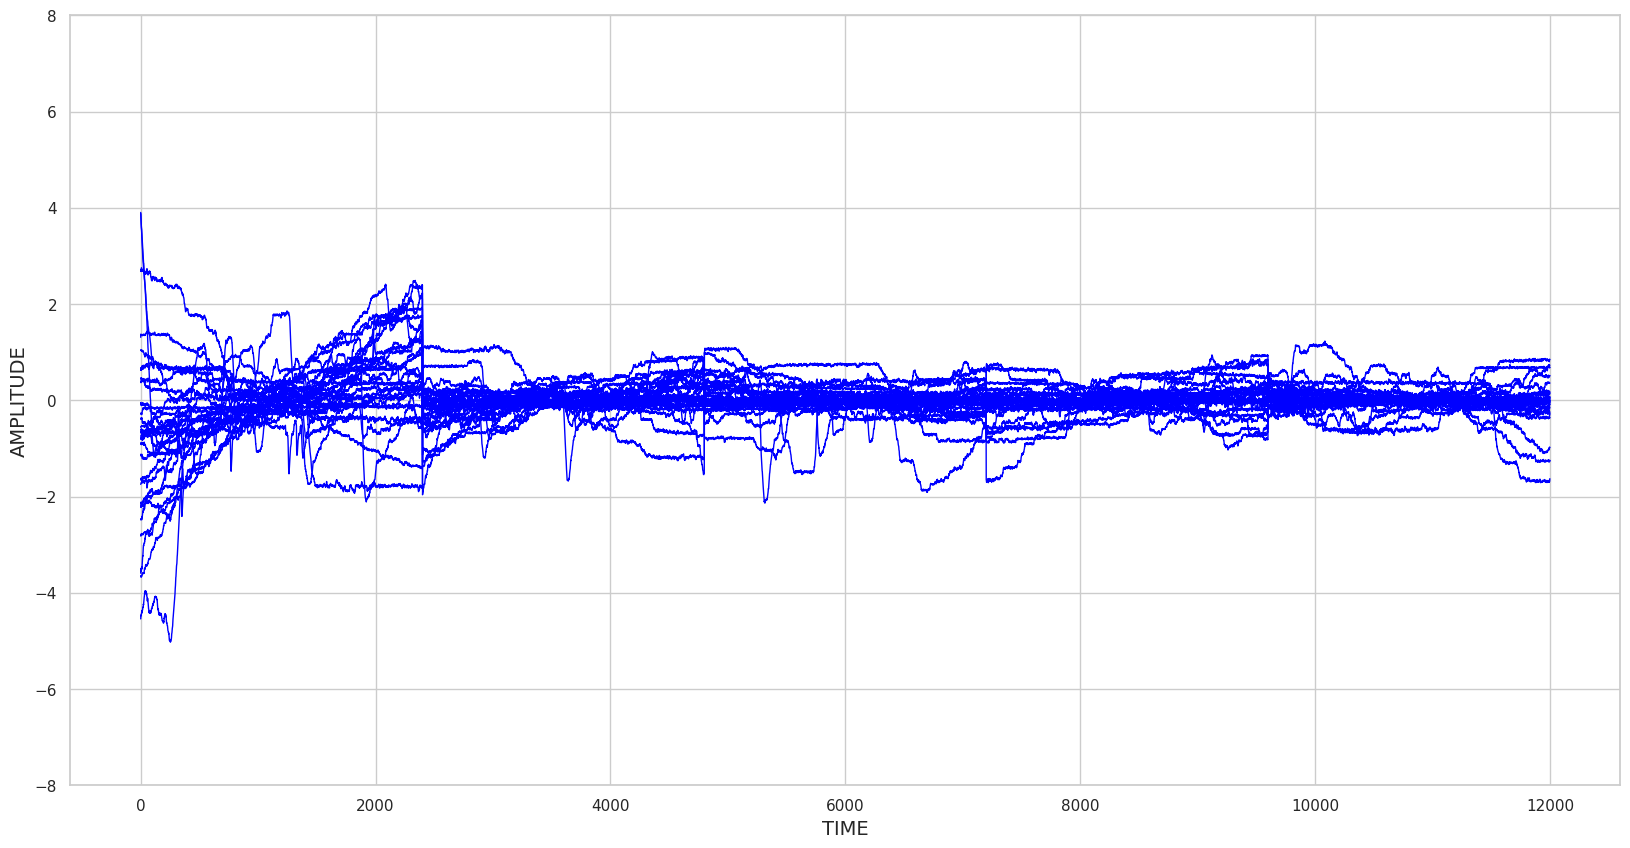

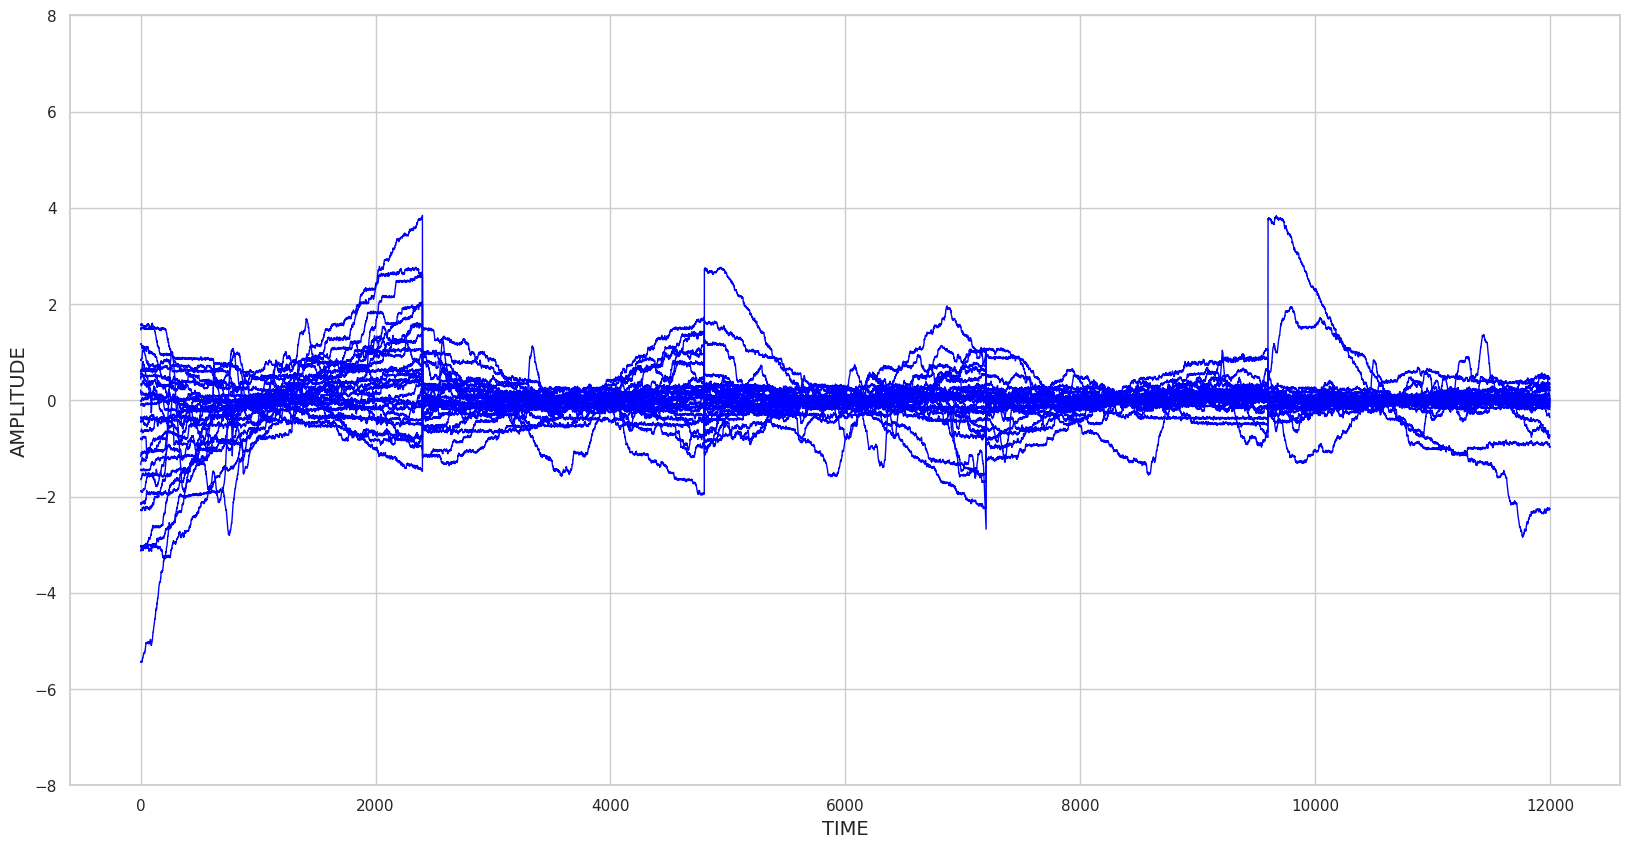

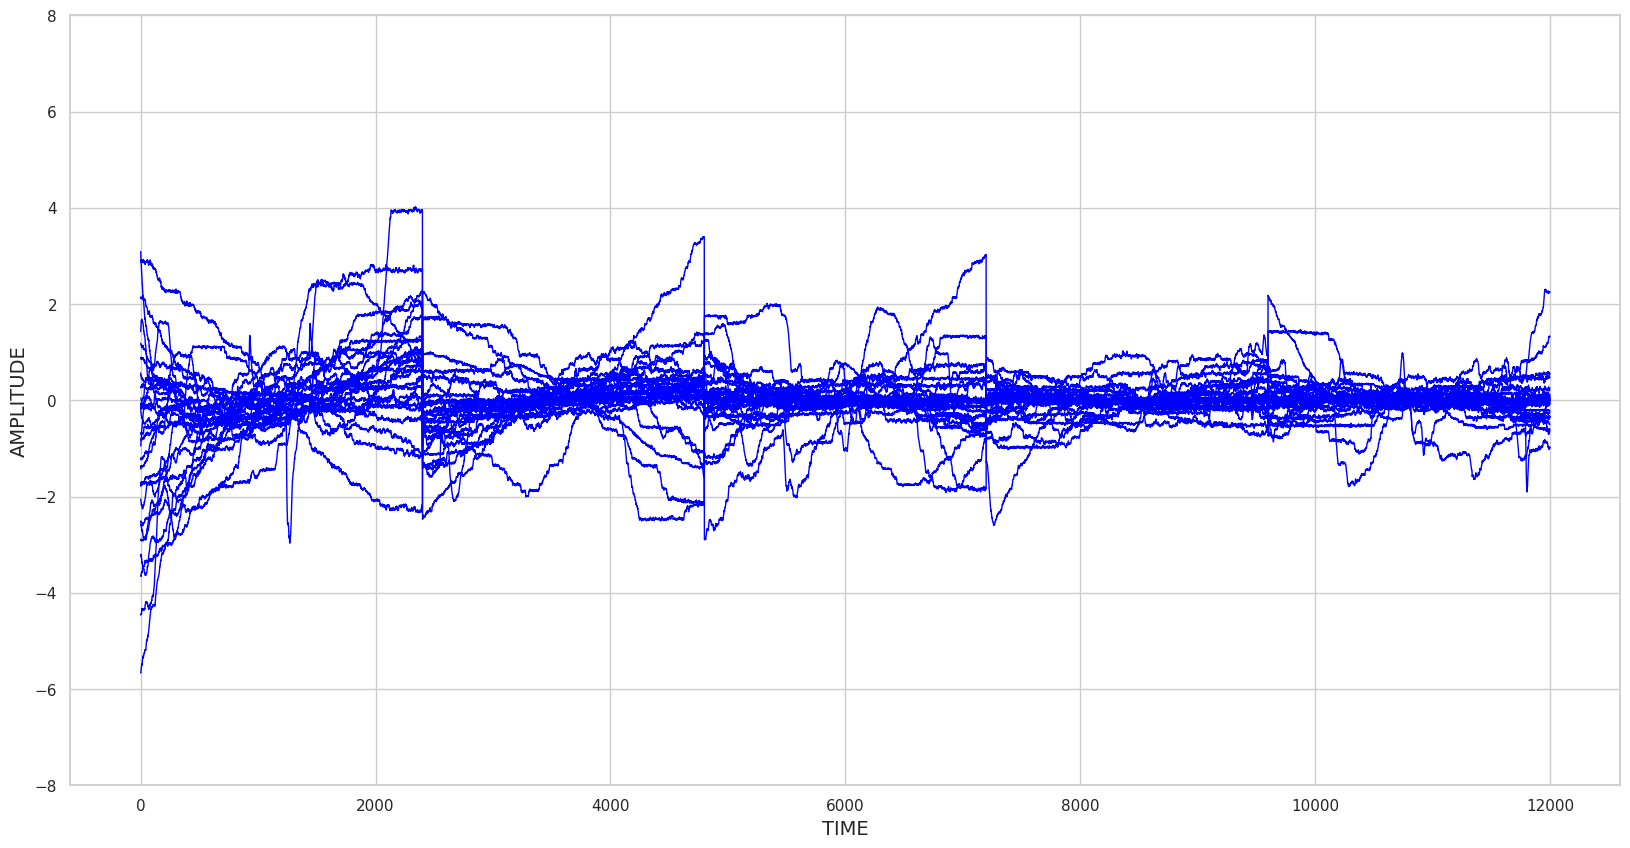

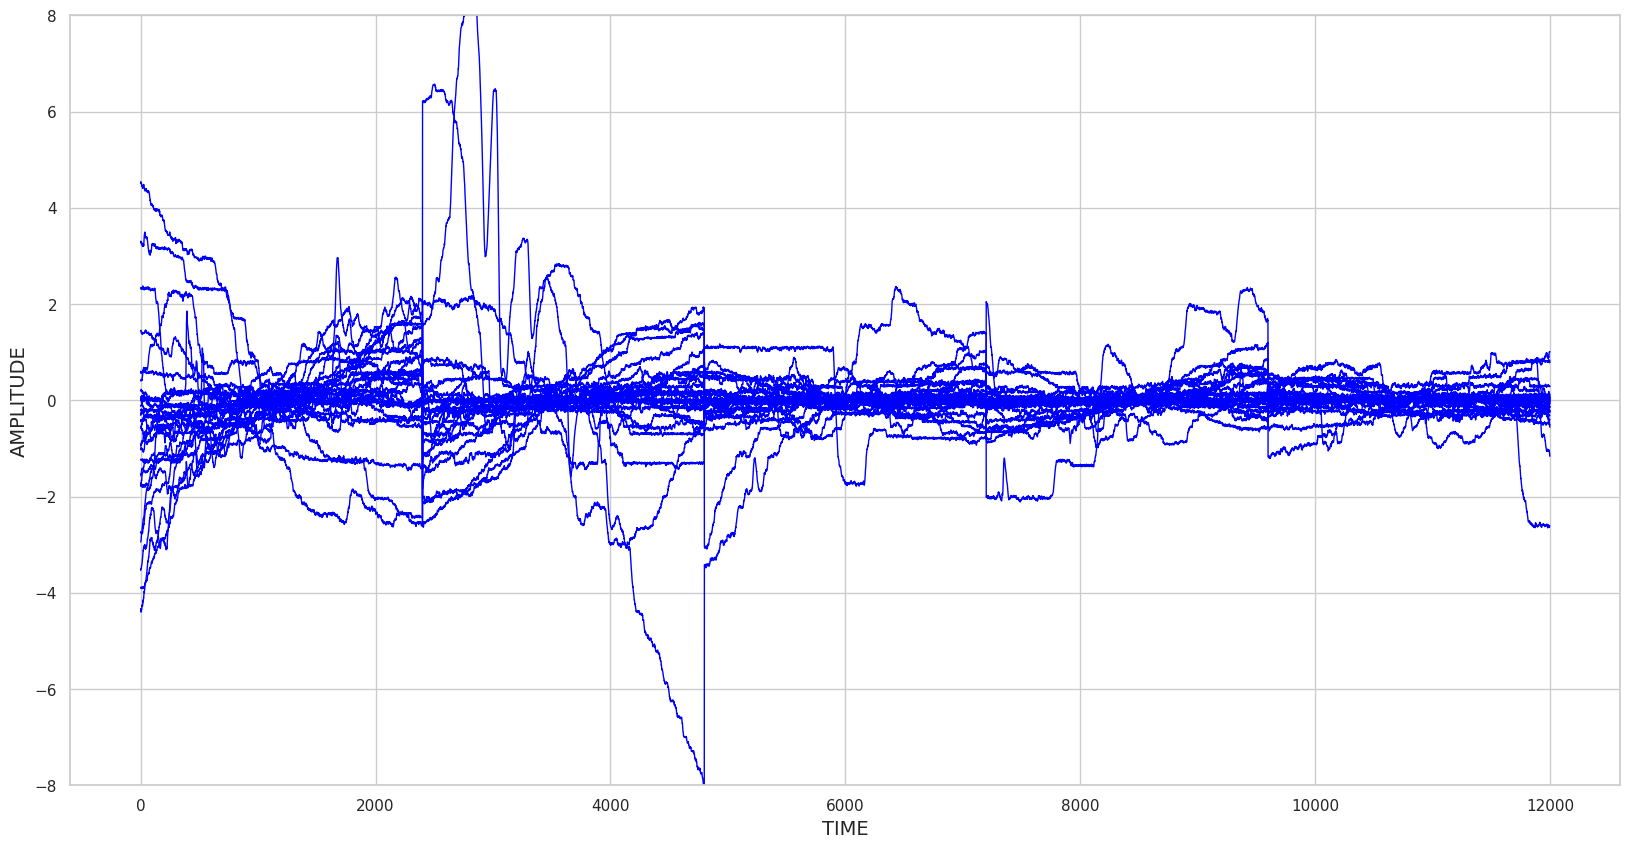

In [11]:
plot_data(deviation_pre_P,'deviation_pre_P_new.jpg')
plot_data(deviation_post_P,'deviation_post_P_new.jpg')
plot_data(deviation_pre_NP,'deviation_pre_NP_new.jpg')
plot_data(deviation_post_NP,'deviation_post_NP_new.jpg')

# CSV OF MEANS (190)****

In [12]:
def median_of_means(LH_all_pre_P, RH_all_pre_P):

    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)

    #Number of states (columns)

    num_states = combined_data.shape[2] # Assuming 5 states as columns 
    means_per_state = []

    # Calculate mean of each column in each 2D array

    for state in range(num_states): 
        means_for_state = []

        for matrix in combined_data: 
            means_for_state.append(np.mean(matrix[:, state])) # Mean of each column for state 
        means_per_state.append(means_for_state)

    return means_per_state

In [13]:
# x=median_of_means(LH_all_pre_P, RH_all_pre_P)
# (np.array(x)).tofile('p_pre.csv', sep=',')
# x=median_of_means(LH_all_post_P, RH_all_post_P)
# (np.array(x)).tofile('p_post.csv', sep=',')
# x=median_of_means(LH_all_post_NP, RH_all_post_NP)
# (np.array(x)).tofile('np_post.csv', sep=',')
# x=median_of_means(LH_all_pre_NP, RH_all_pre_NP)
# (np.array(x)).tofile('np_pre.csv', sep=',')

# CSV OF STDS****

In [14]:
def median_of_stds(LH_all_pre_P, RH_all_pre_P):

    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)

    #Number of states (columns)

    num_states = combined_data.shape[2] # Assuming 5 states as columns 
    means_per_state = []

    # Calculate mean of each column in each 2D array

    for state in range(num_states): 
        means_for_state = []

        for matrix in combined_data: 
            means_for_state.append(np.std(matrix[:, state])) # Mean of each column for state 
        means_per_state.append(means_for_state)

    return means_per_state

In [15]:
# x=median_of_stds(LH_all_pre_P, RH_all_pre_P)
# (np.array(x)).tofile('p_pre_std.csv', sep=',')
# x=median_of_stds(LH_all_post_P, RH_all_post_P)
# (np.array(x)).tofile('p_post_std.csv', sep=',')
# x=median_of_stds(LH_all_post_NP, RH_all_post_NP)
# (np.array(x)).tofile('np_post_std.csv', sep=',')
# x=median_of_stds(LH_all_pre_NP, RH_all_pre_NP)
# (np.array(x)).tofile('np_pre_std.csv', sep=',')

# BOX PLOTS OF MEAN****

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erfcinv

def plot_median_of_mean(LH_all_pre_P, RH_all_pre_P, save_path):
    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)
    
    # Number of states (columns)
    num_states = combined_data.shape[2]  # Assuming states are represented as columns
    stds_per_state = []

    # Calculate standard deviation of each column in each 2D array for each state
    for state in range(num_states): 
        stds_for_state = []
        for matrix in combined_data: 
            stds_for_state.append(np.mean(matrix[:, state]))  # Standard deviation for each state
        stds_per_state.append(stds_for_state)

    # Prepare data for boxplot
    data_for_boxplot = [stds_per_state[state] for state in range(num_states)]

    # Calculate outliers based on scaled MAD
    c = -1 / (np.sqrt(2) * erfcinv(3 / 2))  # Scaling constant
    outliers_per_state = []
    
    for state_data in data_for_boxplot:
        median = np.median(state_data)
        mad = np.median(np.abs(state_data - median))  # Median Absolute Deviation
        scaled_mad = c * mad
        
        lower_bound = median - 3 * scaled_mad
        upper_bound = median + 3 * scaled_mad
        
        # Store the outliers for each state, excluding those within the range (-16, 12) as normal
        outliers = [
            x for x in state_data 
            if (x < lower_bound or x > upper_bound)
        ]
        outliers_per_state.append(outliers)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_for_boxplot, flierprops=dict(marker='+', markersize=10), whis=[0, 100])  # Include all data points
#     sns.boxplot(data=data_for_boxplot, flierprops=dict(marker='+', markersize=10))
    
    # Manually plot outliers calculated above
    for state in range(num_states):
        plt.scatter([state] * len(outliers_per_state[state]), outliers_per_state[state], color='red', label='Outliers' if state == 0 else "", marker='o')

    plt.xticks(ticks=np.arange(num_states), labels=[f'State {i+1}' for i in range(num_states)])
    plt.ylabel('Mean')
    plt.grid(True)
    plt.ylim(-16, 12)
    plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()






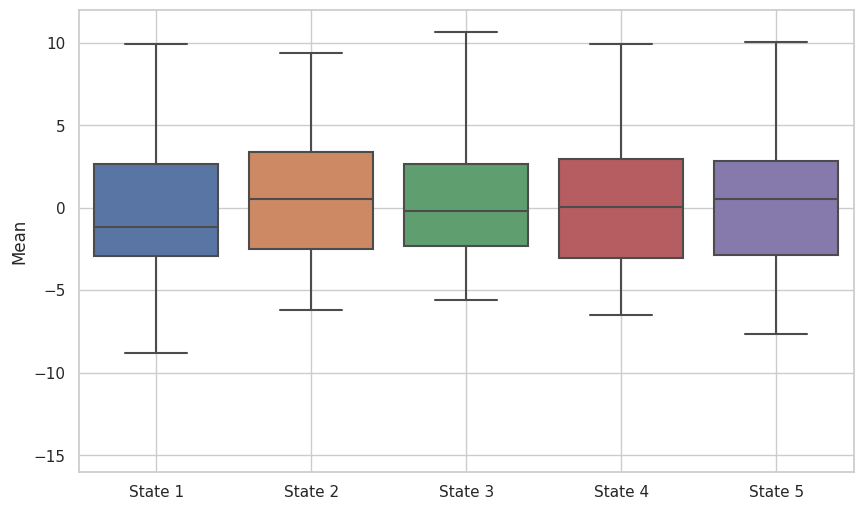

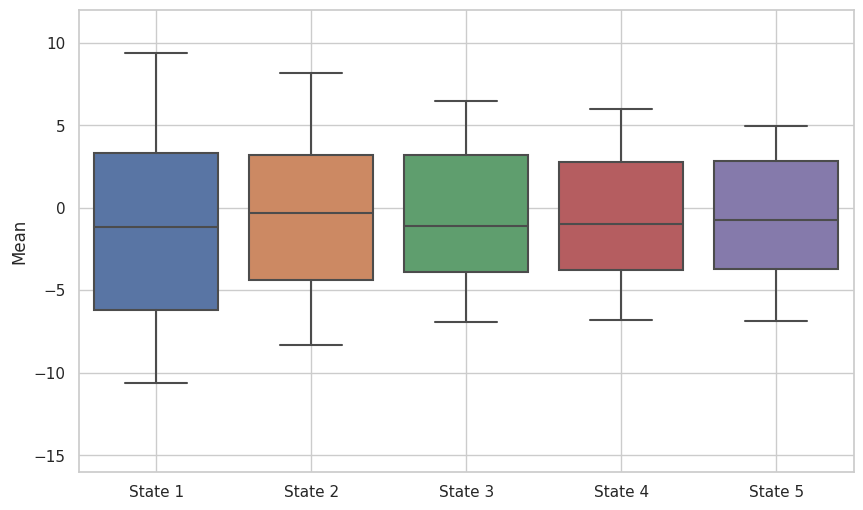

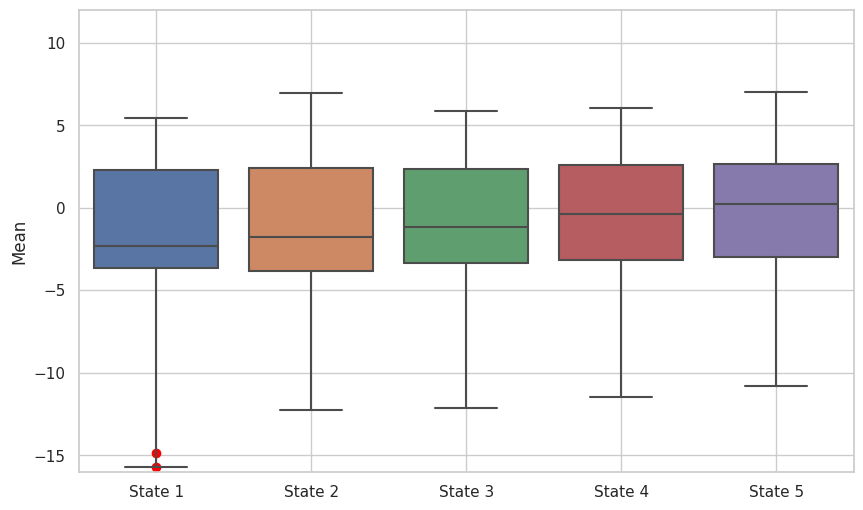

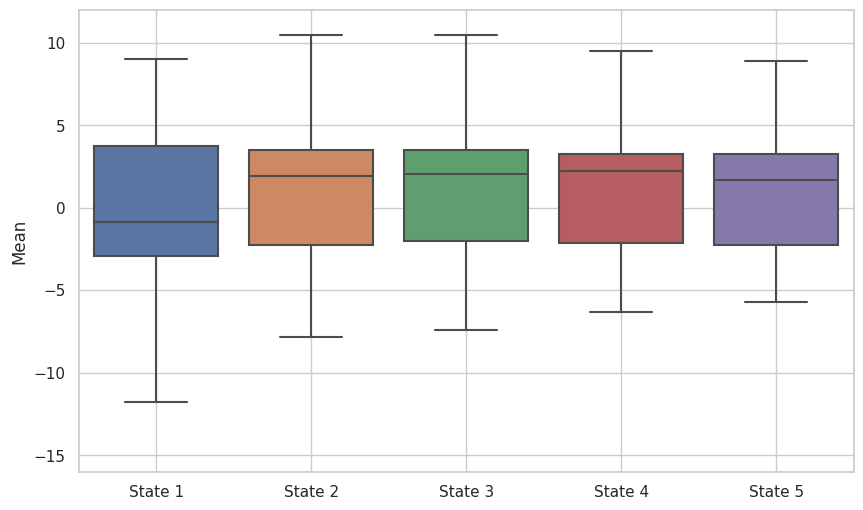

In [17]:
plot_median_of_mean(LH_all_pre_P, RH_all_pre_P, 'mean_pre_P_new.jpg')
plot_median_of_mean(LH_all_post_P, RH_all_post_P, 'mean_post_P_new.jpg')
plot_median_of_mean(LH_all_post_NP, RH_all_post_NP, 'mean_post_NP_new.jpg')
plot_median_of_mean(LH_all_pre_NP, RH_all_pre_NP, 'mean_pre_NP_new.jpg')

# BOX PLOTS OF STDS****

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erfcinv

def plot_median_of_std(LH_all_pre_P, RH_all_pre_P, save_path):
    combined_data = np.concatenate((LH_all_pre_P, RH_all_pre_P), axis=0)
    
    # Number of states (columns)
    num_states = combined_data.shape[2]  # Assuming states are represented as columns
    stds_per_state = []

    # Calculate standard deviation of each column in each 2D array for each state
    for state in range(num_states): 
        stds_for_state = []
        for matrix in combined_data: 
            stds_for_state.append(np.std(matrix[:, state]))  # Standard deviation for each state
        stds_per_state.append(stds_for_state)

    # Prepare data for boxplot
    data_for_boxplot = [stds_per_state[state] for state in range(num_states)]

    # Calculate outliers based on scaled MAD
    c = -1 / (np.sqrt(2) * erfcinv(3 / 2))  # Scaling constant
    outliers_per_state = []
    
    for state_data in data_for_boxplot:
        median = np.median(state_data)
        mad = np.median(np.abs(state_data - median))  # Median Absolute Deviation
        scaled_mad = c * mad
        
        lower_bound = median - 3 * scaled_mad
        upper_bound = median + 3 * scaled_mad
        
        # Store the outliers for each state
        outliers = [x for x in state_data if x < lower_bound or x > upper_bound]
        outliers_per_state.append(outliers)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_for_boxplot, flierprops=dict(marker='+', markersize=10))
    
    # Manually plot outliers calculated above
#     for state in range(num_states):
#         plt.scatter([state] * len(outliers_per_state[state]), outliers_per_state[state], label='Outliers' if state == 0 else "")

    plt.xticks(ticks=np.arange(num_states), labels=[f'State {i+1}' for i in range(num_states)])
    plt.ylabel('SD')
    plt.grid(True)
    plt.ylim(0, 5)
    plt.savefig(save_path, format='jpg', dpi=300)  # Save the figure
    plt.show()


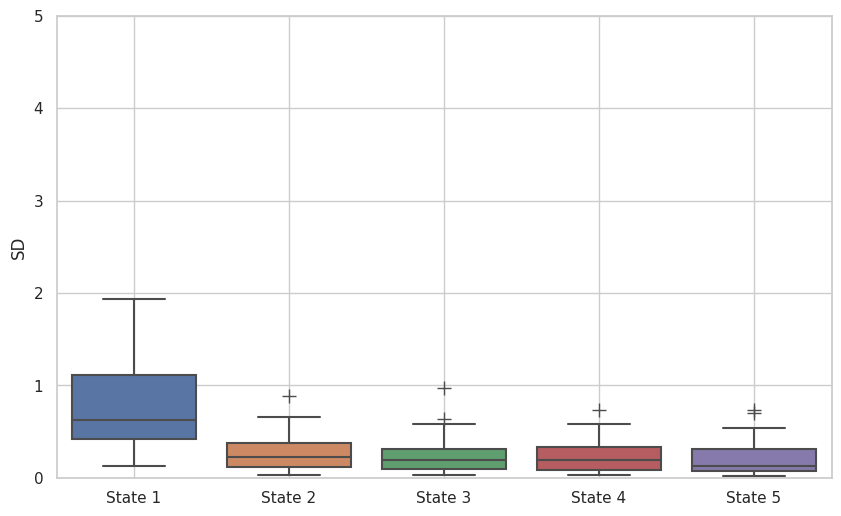

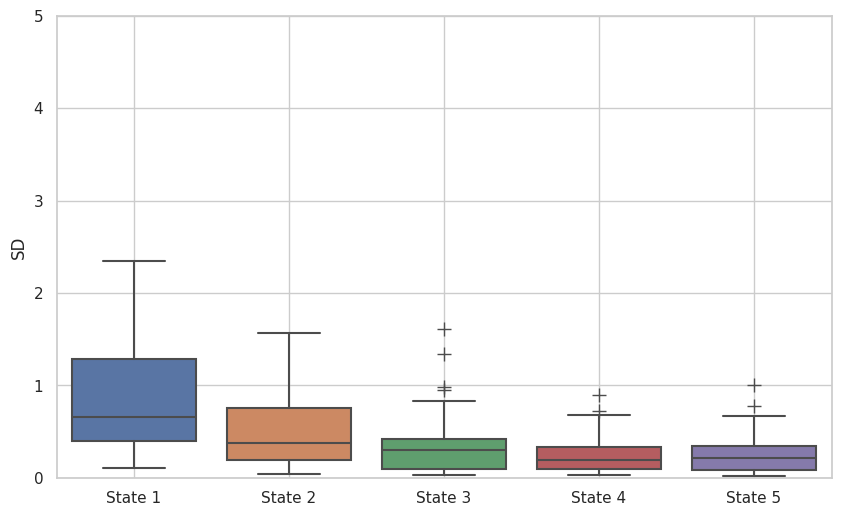

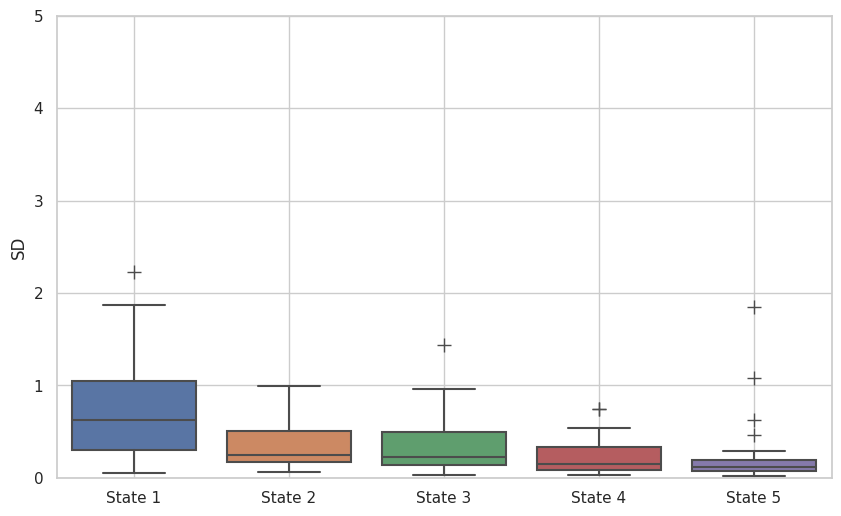

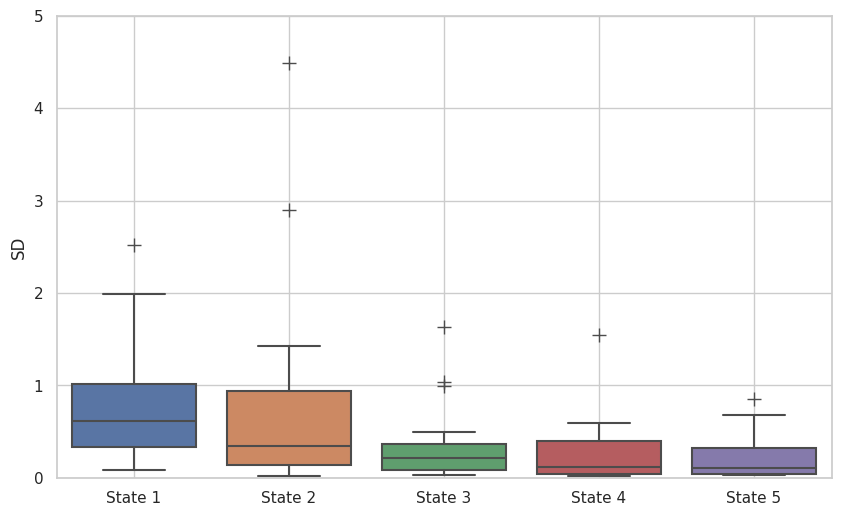

In [19]:
plot_median_of_std(LH_all_pre_P, RH_all_pre_P, 'std_pre_P_new.jpg')
plot_median_of_std(LH_all_pre_NP, RH_all_pre_NP, 'std_pre_NP_new.jpg')
plot_median_of_std(LH_all_post_P, RH_all_post_P, 'std_post_P_new.jpg')
plot_median_of_std(LH_all_post_NP, RH_all_post_NP, 'std_post_NP_new.jpg')

# SELECTED LINES PLOTTING****

In [20]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Function to plot based on selected lines
# def plot_selected_lines(matrix, selected_lines):
#     matrix = np.array(matrix)
#     plt.figure(figsize=(10, 5))
    
#     for i in selected_lines:
#         plt.plot(matrix[i, :], label=f'Line {i+1}')
    
#     plt.title('Selected Lines')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     plt.legend()
#     plt.show()





In [21]:
# Initial plot of all lines
# plot_selected_lines(matrix, list(range(matrix.shape[0])))

# # Loop to allow user to select lines until they wish to stop
# while True:
#     # Simulating user input for line selection
#     selected_lines = input("Enter the indices of lines to plot (e.g., 0, 2, 3): ")
#     selected_lines = [int(i) for i in selected_lines.split(",")]
    
#     # Re-plot based on user selection
#     plot_selected_lines(matrix, selected_lines)
    
#     # Ask the user if they wish to continue
#     continue_plotting = input("Do you wish to continue? (yes/no): ").strip().lower()
    
#     # Check if user input means 'no', if yes, break the loop
#     if continue_plotting in ['no', 'n']:
#         print("Exiting plotting.")
#         break

In [22]:
# flattened_LH_all_pre_P= flatten_3d_to_2d_col(LH_all_pre_P)
# plot_selected_lines(flattened_LH_all_pre_P, list(range(flattened_LH_all_pre_P.shape[0])))
# while True:
#     selected_lines = input("Enter the indices of lines to plot (e.g., 0, 2, 3): ")
#     selected_lines = [int(i) for i in selected_lines.split(",")]
#     plot_selected_lines(flattened_LH_all_pre_P, selected_lines)
#     continue_plotting = input("Do you wish to continue? (yes/no): ").strip().lower()

#     # Check if user input means 'no', if yes, break the loop
#     if continue_plotting in ['no', 'n']:
#         print("Exiting plotting.")
#         break

        
# plot_selected_lines(flattened_LH_all_pre_P)

# NEXT ...****

In [44]:
import numpy as np

# Function to calculate mean and standard deviation for 1D arrays
def calculate_stats(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return mean, std

# Function to divide a 1D array into sets of 200 points and calculate stats for each set
def segment_stats(arr, segment_size=200):
    segments = [arr[i:i+segment_size] for i in range(0, len(arr), segment_size)]
    stats = [calculate_stats(segment) for segment in segments if len(segment) == segment_size]
    return stats

# Compute mean and standard deviation for each 1D array
overall_stats_LH_all_pre_P = [calculate_stats(row) for row in flattened_LH_all_pre_P]
overall_stats_LH_all_post_P = [calculate_stats(row) for row in flattened_LH_all_post_P]
overall_stats_RH_all_pre_P = [calculate_stats(row) for row in flattened_RH_all_pre_P]
overall_stats_RH_all_post_P = [calculate_stats(row) for row in flattened_RH_all_post_P]

overall_stats_LH_all_pre_NP = [calculate_stats(row) for row in flattened_LH_all_pre_NP]
overall_stats_LH_all_post_NP = [calculate_stats(row) for row in flattened_LH_all_post_NP]
overall_stats_RH_all_pre_NP = [calculate_stats(row) for row in flattened_RH_all_pre_NP]
overall_stats_RH_all_post_NP = [calculate_stats(row) for row in flattened_RH_all_post_NP]

# Compute segment-wise stats for each 1D array
segmented_LH_all_pre_P = [segment_stats(row) for row in flattened_LH_all_pre_P]
segmented_LH_all_post_P = [segment_stats(row) for row in flattened_LH_all_post_P]
segmented_RH_all_pre_P = [segment_stats(row) for row in flattened_RH_all_pre_P]
segmented_RH_all_post_P = [segment_stats(row) for row in flattened_RH_all_post_P]

segmented_LH_all_pre_NP = [segment_stats(row) for row in flattened_LH_all_pre_NP]
segmented_LH_all_post_NP = [segment_stats(row) for row in flattened_LH_all_post_NP]
segmented_RH_all_pre_NP = [segment_stats(row) for row in flattened_RH_all_pre_NP]
segmented_RH_all_post_NP = [segment_stats(row) for row in flattened_RH_all_post_NP]

def normalize_segments(arr, overall_mean, overall_std, segment_size=200):
    segments = [arr[i:i+segment_size] for i in range(0, len(arr), segment_size)]
    normalized_segments = [(segment - overall_mean) / overall_std for segment in segments if len(segment) == segment_size]
    return normalized_segments

# Normalize segments for each row in the 2D array
normalized_segments_LH_all_pre_P = [
    normalize_segments(row, overall_stats_LH_all_pre_P[idx][0], overall_stats_LH_all_pre_P[idx][1])
    for idx, row in enumerate(flattened_LH_all_pre_P)
]
normalized_segments_LH_all_post_P = [
    normalize_segments(row, overall_stats_LH_all_post_P[idx][0], overall_stats_LH_all_post_P[idx][1])
    for idx, row in enumerate(flattened_LH_all_post_P)
]
normalized_segments_RH_all_pre_P = [
    normalize_segments(row, overall_stats_RH_all_pre_P[idx][0], overall_stats_RH_all_pre_P[idx][1])
    for idx, row in enumerate(flattened_RH_all_pre_P)
]
normalized_segments_RH_all_post_P = [
    normalize_segments(row, overall_stats_RH_all_post_P[idx][0], overall_stats_RH_all_post_P[idx][1])
    for idx, row in enumerate(flattened_RH_all_post_P)
]

normalized_segments_LH_all_pre_NP = [
    normalize_segments(row, overall_stats_LH_all_pre_NP[idx][0], overall_stats_LH_all_pre_NP[idx][1])
    for idx, row in enumerate(flattened_LH_all_pre_NP)
]
normalized_segments_LH_all_post_NP = [
    normalize_segments(row, overall_stats_LH_all_post_NP[idx][0], overall_stats_LH_all_post_NP[idx][1])
    for idx, row in enumerate(flattened_LH_all_post_NP)
]
normalized_segments_RH_all_pre_NP = [
    normalize_segments(row, overall_stats_RH_all_pre_NP[idx][0], overall_stats_RH_all_pre_NP[idx][1])
    for idx, row in enumerate(flattened_RH_all_pre_NP)
]
normalized_segments_RH_all_post_NP = [
    normalize_segments(row, overall_stats_RH_all_post_NP[idx][0], overall_stats_RH_all_post_NP[idx][1])
    for idx, row in enumerate(flattened_RH_all_post_NP)
]




In [45]:
from scipy.stats import skew, kurtosis
import numpy as np



# Function to calculate desired statistics for a single segment
def calculate_extended_stats(segment):
    mean = np.mean(segment)
    std = np.std(segment)
    var = np.var(segment)
    skewness = skew(segment)
    kurt = kurtosis(segment)
    return mean, std, var, skewness, kurt

# Calculate statistics for all rows
def calculate_row_stats(normalized_row_segments):
    row_stats = [calculate_extended_stats(segment) for segment in normalized_row_segments]
    return row_stats

all_rows_stats_LH_pre_P = [
    calculate_row_stats(row) for row in normalized_segments_LH_all_pre_P
]
all_rows_stats_LH_post_P = [
    calculate_row_stats(row) for row in normalized_segments_LH_all_post_P
]
all_rows_stats_RH_pre_P = [
    calculate_row_stats(row) for row in normalized_segments_RH_all_pre_P
]
all_rows_stats_RH_post_P = [
    calculate_row_stats(row) for row in normalized_segments_RH_all_post_P
]

all_rows_stats_LH_pre_NP = [
    calculate_row_stats(row) for row in normalized_segments_LH_all_pre_NP
]
all_rows_stats_LH_post_NP = [
    calculate_row_stats(row) for row in normalized_segments_LH_all_post_NP
]
all_rows_stats_RH_pre_NP = [
    calculate_row_stats(row) for row in normalized_segments_RH_all_pre_NP
]
all_rows_stats_RH_post_NP = [
    calculate_row_stats(row) for row in normalized_segments_RH_all_post_NP
]




ValueError: data type <class 'numpy.object_'> not inexact

In [43]:
import csv

# Prepare data for CSV
csv_data = [["Row", "Segment", "Mean", "Std", "Variance", "Skewness", "Kurtosis", "resp"]]

# Define the mapping for each stats list to the corresponding "resp" value
stats_to_resp = {
    "all_rows_stats_LH_pre_P": "LH pre Player",
    "all_rows_stats_LH_post_P": "LH post Player",
    "all_rows_stats_RH_pre_P": "RH pre Player",
    "all_rows_stats_RH_post_P": "RH post Player",
    "all_rows_stats_LH_pre_NP": "LH pre Non-Player",
    "all_rows_stats_LH_post_NP": "LH post Non-Player",
    "all_rows_stats_RH_pre_NP": "RH pre Non-Player",
    "all_rows_stats_RH_post_NP": "RH post Non-Player"
}

# Define all your stats datasets here
all_stats_dict = {
    "all_rows_stats_LH_pre_P": all_rows_stats_LH_pre_P,
    "all_rows_stats_LH_post_P": all_rows_stats_LH_post_P,
    "all_rows_stats_RH_pre_P": all_rows_stats_RH_pre_P,
    "all_rows_stats_RH_post_P": all_rows_stats_RH_post_P,
    "all_rows_stats_LH_pre_NP": all_rows_stats_LH_pre_NP,
    "all_rows_stats_LH_post_NP": all_rows_stats_LH_post_NP,
    "all_rows_stats_RH_pre_NP": all_rows_stats_RH_pre_NP,
    "all_rows_stats_RH_post_NP": all_rows_stats_RH_post_NP
}

# Loop through each dataset and add the corresponding "resp"
for stats_name, stats_data in all_stats_dict.items():
    resp_value = stats_to_resp[stats_name]
    
    # Add data to csv_data with the 'resp' column
    for row_idx, row_stats in enumerate(stats_data):
        for seg_idx, stats in enumerate(row_stats):
            csv_data.append([row_idx + 1, seg_idx + 1] + list(stats) + [resp_value])

# Write to CSV
output_csv_path = "stats_with_all_resps.csv"
with open(output_csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print(f"CSV file saved to {output_csv_path}")


NameError: name 'all_rows_stats_LH_pre_P' is not defined

In [42]:



import pandas as pd

# Mapping of row numbers to sub-codes
row_to_subcode = {
    1: "S041", 2: "S041", 3: "S046", 4: "S045", 5: "SO44",
    6: "S041", 7: "S042", 8: "SO49", 9: "S057", 10: "SO53",
    11: "S055", 12: "SO54", 13: "S058", 14: "S064"
}

# Load the CSV file
input_csv_path = "LH_all_pre_stats.csv"
df = pd.read_csv(input_csv_path)

# We assume 60 segments per row. We will replace 'Row' column values in sets of 60
sub_codes = []

# Iterate through the rows in chunks of 60
for i in range(0, len(df), 60):
    # Find the sub-code for the current row's group
    row_num = (i // 60) + 1  # Determine the row number based on chunk position
    sub_code = row_to_subcode.get(row_num, "Unknown")
    
    # For each 60-row block, assign the corresponding sub-code
    sub_codes.extend([sub_code] * 60)

# Replace the 'Row' column with the sub-codes for the entire chunk
df['Sub-Code'] = sub_codes
df['resp'] = "LH pre Player"

# Drop the original 'Row' column
df.drop(columns=['Row'], inplace=True)

# Save the updated CSV
output_csv_path = "LH_all_pre_stats_with_subcodes.csv"
df.to_csv(output_csv_path, index=False)




In [30]:
num_rows = len(all_rows_stats)  # Number of rows
num_segments_per_row = [len(row) for row in all_rows_stats]  # Number of segments per row

print("Shape of normalized_segments_LH_all_pre:")
print(f"Rows: {num_rows}")
print(f"Segments per row: {num_segments_per_row}")

Shape of normalized_segments_LH_all_pre:
Rows: 14
Segments per row: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
